This notebook contains the scripts to:
1. cluster  nodes into clusters based on temporal patterns
2. fitting nodes to sigmoid curves

Goal: characterize node timecourses and potentially express nodes as f(other nodes)

In [1]:
# RUN THIS CELL
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [3]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", 
            "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", 
            "SURPRISING-B", "TENNIS-A"]

In [4]:
# load each movie
movie_ind = 4
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy


In [5]:
movieTC.shape #subs, nodes, timepts

(1049, 268, 43)

In [6]:
data_file_loc

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data'

## Figures to plot all nodes' activations separately, together, or movie-wise (can skip)

In [7]:
save_yfigs = 0

In [1]:
# Takes time to run this  - watch out!!
if save_yfigs:
    ncols = 20
    nrows = int(np.ceil(268/ncols))
    xwidth,yheight = 120,30*(1.5*ncols/nrows)

    nodes = range(268)
    start_time = time.time()
    # load each movie, perform linear regression for each sub and roi for that movie
    for movie_ind in np.arange(1,10):
        print(f'time elapsed: {time.time()-start_time}secs')
        fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
        print(fileName)
        movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
        fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
        fig.set_figwidth(xwidth)
        fig.set_figheight(yheight)
        for n in nodes: #range(movieTC.shape[1]):
            r = int(np.floor(n/ncols))
            c = int(np.floor(n%ncols))
            mat = movieTC[:,n,:]
            ax[r,c].errorbar(range(mat.shape[1]),np.mean(mat, axis = 0),stats.sem(mat, axis = 0), alpha =.5)
            ax[r,c].set_title("Node" + str(n+1))
            ax[r,c].set_ylim(-.75,.75)
            ax[r,c].set_ylabel('Norm. BOLD')
            ax[r,c].set_xlabel('Image nr.')
            
        plt.tight_layout()
        plt.savefig(os.path.join(data_file_loc,'figures',f'tc_fig_movie{movie_ind}.png'))  

NameError: name 'save_yfigs' is not defined

In [55]:
if save_yfigs:
    ncols = 20
    nrows = int(np.ceil(268/ncols))
    xwidth,yheight = 60,15*(1.5*ncols/nrows)

    nodes = range(268)
    start_time = time.time()

    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    for movie_ind in range(10):
        print(f'time elapsed: {time.time()-start_time}secs')
        fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
        #print(fileName)
        movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
        for n in nodes: #range(movieTC.shape[1]):
            r = int(np.floor(n/ncols))
            c = int(np.floor(n%ncols))
            mat = movieTC[:,n,:]
            ax[r,c].errorbar(range(mat.shape[1]),np.mean(mat, axis = 0),stats.sem(mat, axis = 0), alpha =1, label = 'movie'+str(movie_ind))
            ax[r,c].set_title("Node" + str(n+1))
            if movie_ind == 0:
                ax[r,c].set_ylim(-.75,.75)
                ax[r,c].set_ylabel('Norm. BOLD')
                ax[r,c].set_xlabel('Image nr.')

    plt.tight_layout()
    plt.savefig(os.path.join(data_file_loc,'figures',f'tc_fig_allMovies.png'))  

In [70]:
if save_yfigs:
    ncols = 5
    nrows = int(np.ceil(10/ncols))
    xwidth,yheight = 25,25*nrows/ncols

    nodes = range(268)
    start_time = time.time()

    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    for movie_ind in range(10):
        print(f'time elapsed: {time.time()-start_time}secs')
        fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
        print(fileName)
        movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
        r = int(np.floor(movie_ind/ncols))
        c = int(np.floor(movie_ind%ncols))

        for n in nodes: #range(movieTC.shape[1]):
            mat = movieTC[:,n,:]
            ax[r,c].errorbar(range(mat.shape[1]),np.mean(mat, axis = 0),stats.sem(mat, axis = 0), alpha =1)
            if n == 0:
                ax[r,c].set_title("Movie" + str(movie_ind+1))
                ax[r,c].set_ylim(-.75,.75)
                ax[r,c].set_ylabel('Norm. BOLD')
                ax[r,c].set_xlabel('Image nr.')
                ax[r,c].set_title('movie'+str(movie_ind))

    plt.tight_layout()
    plt.savefig(os.path.join(data_file_loc,'figures',f'tc_fig_movieWise.png'))  
    

## Perform k-means clustering on the nodes averaged across subjects to identify curve patterns - run cells 1 and 2

In [13]:
# RUN THIS CELL
#import sklearn
from sklearn.cluster import KMeans

In [14]:
# RUN THIS CELL
def get_training_instances_matrix(movie_ind):
    fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
    #print('opening file ',fileName)
    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
    movieTC = movieTC[:,:,:28]
    X = np.mean(movieTC, axis = 0) #nodes, timepts
    return X,movieTC

(268, 28)

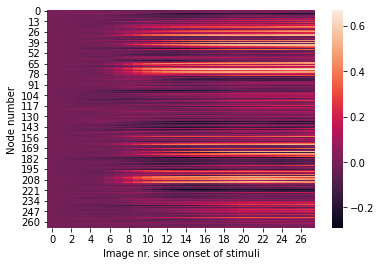

In [11]:
movie_ind = 4
X,movieTC = get_training_instances_matrix(movie_ind)
sns.heatmap(X)
plt.xlabel('Image nr. since onset of stimuli')
plt.ylabel('Node number')
X.shape

### 1.Group-level silhouette analysis

In this section I tried to determine the optimal number of clusters of timecourses - the ultimate goal being to understand the hidden timecourse structures. Code from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Used the kmeans clustering algorithm on a single movie (usually random mechanical  Used this as an exemplar for most of these analyses since this was the most ambiguously perceived (relevant for future yes vs. no analyses). But it's possible one of the less ambiguous nodes could have cleaner clusters - either way, end goal was not perfect clusters but the underlying temporal structures of nodes to be used as a reference for future analyses.

In [9]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6627819545945455
For n_clusters = 3 The average silhouette_score is : 0.48032240464115017
For n_clusters = 4 The average silhouette_score is : 0.42422204725757856
For n_clusters = 5 The average silhouette_score is : 0.41705265468916297
For n_clusters = 6 The average silhouette_score is : 0.35521195108600695
For n_clusters = 7 The average silhouette_score is : 0.3243074534625022
For n_clusters = 8 The average silhouette_score is : 0.3140525930781607
For n_clusters = 9 The average silhouette_score is : 0.3248365217286507
For n_clusters = 10 The average silhouette_score is : 0.306187492566717


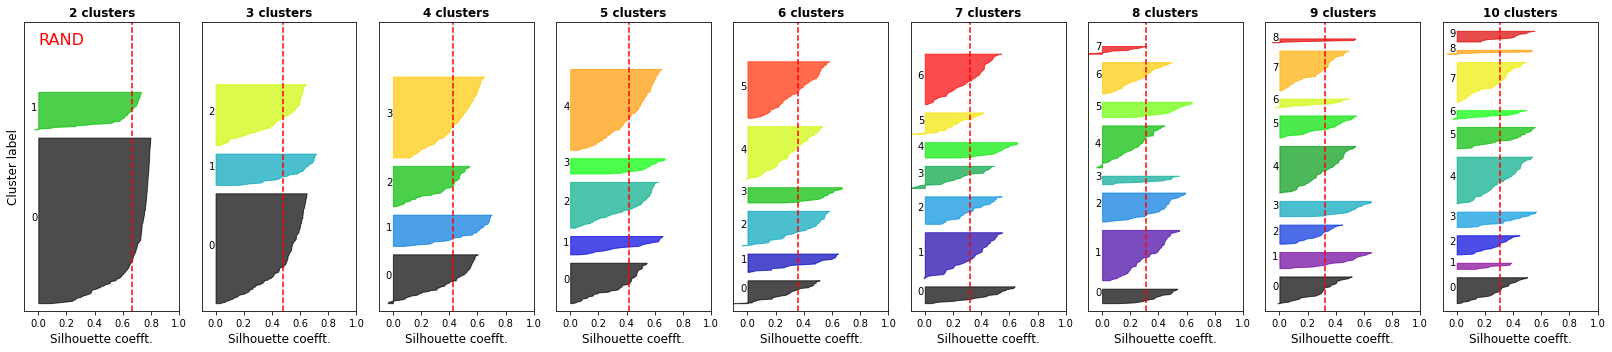

In [8]:
# Plotting silhouette plots different numbers of clusters (see next line)

movie_ind =4 # video: random mechanical.
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
ncols = len(range_n_clusters)
nrows = 1
yheight = 5
xwidth = yheight/2*ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
#fig.set_figwidth(xwidth)
#fig.set_figheight(yheight)
        
silhouette_avg_array = []
for col,n_clusters in enumerate(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax[col].set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    X,movieTC = get_training_instances_matrix(movie_ind)
    ax[col].set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clus_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, clus_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_array.append([n_clusters,silhouette_avg])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clus_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clus_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax[col].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[col].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    #if n_clusters==range_n_clusters[0]:
    #    ax1.set_title("The silhouette plot for the \nvarious clusters.", fontsize = 'large')

    ax[col].set_xlabel("Silhouette coefft.", fontsize = 'large')
    ax[col].set_title(str(n_clusters)+ " clusters", fontsize = 'large', fontweight = 'bold')
    
    if col == 0:
        ax[col].set_ylabel("Cluster label", fontsize = 'large')
        ax[col].text(0, 350,str.upper(vidnames[movie_ind])[:4], fontsize=16, color = 'red')
    

    # The vertical line for average silhouette score of all the values
    ax[col].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[col].set_yticks([])  # Clear the yaxis labels / ticks
    ax[col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
#plt.show()

(0.0, 1.0)

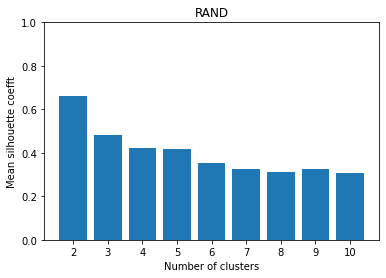

In [9]:
plt.bar(np.array(silhouette_avg_array)[:,0],np.array(silhouette_avg_array)[:,1])
plt.xlabel('Number of clusters')
plt.ylabel('Mean silhouette coefft')
plt.xticks(np.array(silhouette_avg_array)[:,0])
plt.title(str.upper(vidnames[movie_ind])[:4])
plt.ylim(0,1)

### 2.Subjectwise silhouette analysis

After the silhouette analysis on the mean data (to determine the optimal #clusters, I did the same for each subject as a sanity check. In general, cluster 2 had the highest score (i.e., that it is best), but visually you can see that it has one meaningful cluster and one "dump". 3 or 4 clusters made more sense (higher nos. too perhaps, but here we didn't probe it much higher, since we just wanted to get some possible cluster shapes). Using another clustering algorithm could work too if this analysis is to be used to actually divide nodes based on clusters.

In [6]:
def get_training_instances_matrix_subjectwise(movieTC,subj):
    X = movieTC[subj,:,:28]
    return X

#subjectwise silhouette analysis
start_time = time.time()
_,movieTC = get_training_instances_matrix(movie_ind)
nsub = movieTC.shape[0]
range_n_clusters = [2, 3, 4, 5, 6,7, 8, 9, 10]
silhouetteavg_per_sub_cluster = np.zeros((nsub,max(range_n_clusters)+1))
for n_clusters in range_n_clusters:
    print(str(n_clusters) + 'clusters.' + str(time.time()-start_time) + 'secs have elapsed.')
    for sub in range(nsub):
        X = get_training_instances_matrix_subjectwise(movieTC,sub)
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        clus_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, clus_labels)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        silhouetteavg_per_sub_cluster[sub,n_clusters]=silhouette_avg
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, clus_labels)

NameError: name 'movie_ind' is not defined

(1049, 11)
0.16545190326074766


Text(33.0, 0.5, 'Mean silhouette coefficients')

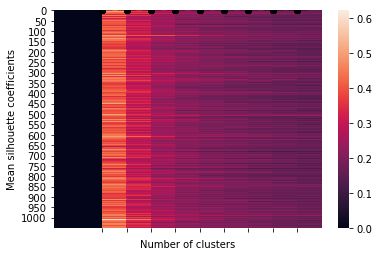

In [17]:
print(silhouetteavg_per_sub_cluster.shape)
sns.heatmap(silhouetteavg_per_sub_cluster)
print(np.mean(silhouetteavg_per_sub_cluster[:,-1]))

#plt.errorbar(np.arange(2,11),np.mean(silhouetteavg_per_sub_cluster[:,2:],axis=0),
#             stats.sem(silhouetteavg_per_sub_cluster[:,2:],axis=0),ls = 'None', marker = '.', color = 'k')

for sub in range(silhouetteavg_per_sub_cluster[:,2:].shape[0]):
    plt.plot(np.arange(2,11),silhouetteavg_per_sub_cluster[sub,2:],ls = 'None', marker = 'o', color = 'k', alpha = .05)
plt.bar(np.arange(2,11),np.mean(silhouetteavg_per_sub_cluster[:,2:],axis=0), alpha = .3, edgecolor = 'k')
plt.xticks(np.arange(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Mean silhouette coefficients')

### 3.Create and plot clusters

This section is to generate clusters by k-means clustering (same as used for silhouette analyses above) and to plot the node timecourses(averaged across all subs) within each cluster. 
Sanity checks: 
1. barplots of the estimates from the slope GLM fits (from the GLMs implemented in the notebook: fMRI_GLM_firstlevel.ipynb). Mean slopes should roughly correspond to our cluster timecourse shapes
2. cross-correlation between nodes. Ideally we'd expect nodes within the same cluster/similar clusters to correlate more and see about x blobs for x clusters.

In [15]:
# RUN THIS CELL
def cluster_node_timecourses(X,nclusters,print_results):
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    if print_results:
        print('\nlabels:' + str(kmeans.labels_) + ', length:' + str(len(kmeans.labels_)))
        for i in range(nclusters):
            print('\ncluster',i,'=',len(np.where(kmeans.labels_==i)[0]))
    return kmeans.labels_

In [16]:
movie_ind = 4
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 3
labels = cluster_node_timecourses(X,nclusters,0)

In [17]:
# RUN THIS CELL
def plot_timecourses(labels,movieTC,movie_ind):
    print('movie:'+ vidnames[movie_ind])
    unique_clusters = np.unique(labels)
    nclusters = len(unique_clusters)
    
    #plt.figure(1, figsize = (5*nclusters,5))
    plt.figure(1, figsize = (5*nclusters,10))
    plt.suptitle(vidnames[movie_ind],fontweight = 'bold', fontsize = 12)
    
    if nclusters <= 3:
        nrows = 1
    else:
        nrows = np.ceil(nclusters/3)
    ncols = 3
    nodes_cluster= []
    nodes_cluster_cum= []
    for c in unique_clusters:
        
        plt.subplot(2,nclusters,c+1)
        nodes = np.where(labels==c)[0]
        ind = -1

        for n in nodes:
            ind += 1
            row = int(np.floor(ind/ncols))
            col = int(np.floor(ind%ncols))
            mat = movieTC[:,n,:]#sub*timepts
            plt.errorbar(range(mat.shape[1]),np.mean(mat, axis = 0),stats.sem(mat, axis = 0), label = "Node" + str(n+1))
        plt.title('cluster '+str(c) +', ' + str(ind) + 'nodes')
        print(str(ind)+'nodes')
        nodes_cluster.append(ind)
        nodes_cluster_cum.append(np.sum(nodes_cluster))
    plt.tight_layout()
    
    
    
    fileName = os.path.join(data_file_loc,'betapermovie_slopereg.npy')
    beta_slopes = np.load(fileName) # (1049, 10, 268)
    beta_movie = np.mean(beta_slopes[:,movie_ind,:],axis = 0) # averaged across subs
    
    #plt.figure(2,figsize =(4,4))
    plt.subplot(2,2,3)
        
    cluster_means = [np.mean(beta_movie[np.where(labels==i)]) for i in range(nclusters)]
    plt.bar(np.arange(0,nclusters),cluster_means, color = 'grey')
    plt.plot(labels,beta_movie,marker = '.', ls = 'none')
    cluster_lbls = ['cluster'+str(i) for i in range(nclusters)]
    plt.xticks(range(nclusters),cluster_lbls)
    plt.ylabel('Mean reg coefft(avged. \nacross subs)')
    plt.title('Slope regressor coeffts. per cluster', fontsize = 12)
    
    
    #plt.figure(3,figsize = (5,5))
    plt.subplot(2,2,4)
        
    nodes = list(range(268))
    nodes_sorted = [x for _,x in sorted(zip(labels,nodes))]
    nt = 28
    meanTimecourse = np.mean(movieTC[:,:,:nt],axis = 0) # nodes, timepts
    mat0 = np.zeros((len(nodes),len(nodes)))
    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes_sorted): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes_sorted):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse[n1,:31],meanTimecourse[n2,:31])
            #mat0[i1,i2],p = stats.spearmanr(meanTimecourse[n1,:31],meanTimecourse[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0, alpha =.3,square = True)
    #sns.heatmap(mat, alpha =0.3)
    plt.hlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.vlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.xlabel('nodes_sorted')
    plt.ylabel('nodes_sorted')
    plt.title('Pearson correlation')
    
    plt.tight_layout()
    '''plt.figure(4,figsize = (5,5))
    sns.heatmap(mat-mat0, cmap = 'RdBu_r', center =0, alpha =.3)
    plt.hlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.vlines(nodes_cluster_cum,0,268, color = 'k', ls = 'solid')
    plt.xlabel('nodes_sorted')
    plt.ylabel('nodes_sorted')'''

### 3.1. Exploring different numbers of clusters for RANDOM MECH

In most of the single-movie analyses I've used the stimulus 'random mechanical' as the exemplar since it appears to have been perceived the most ambiguously.

Movie: Random mechanical
movie:Random mechanical
49nodes
217nodes


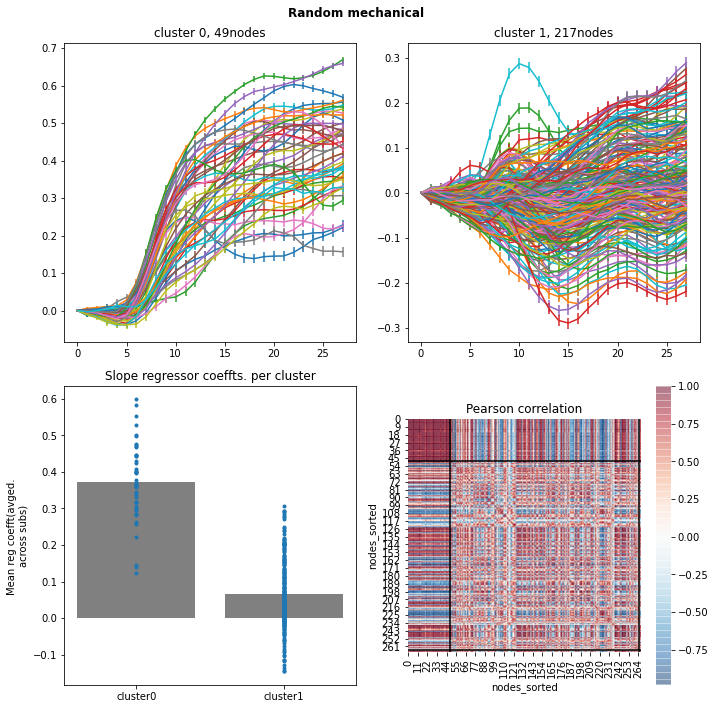

In [45]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 2 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

Movie: Random mechanical
movie:Random mechanical
80nodes
41nodes
144nodes


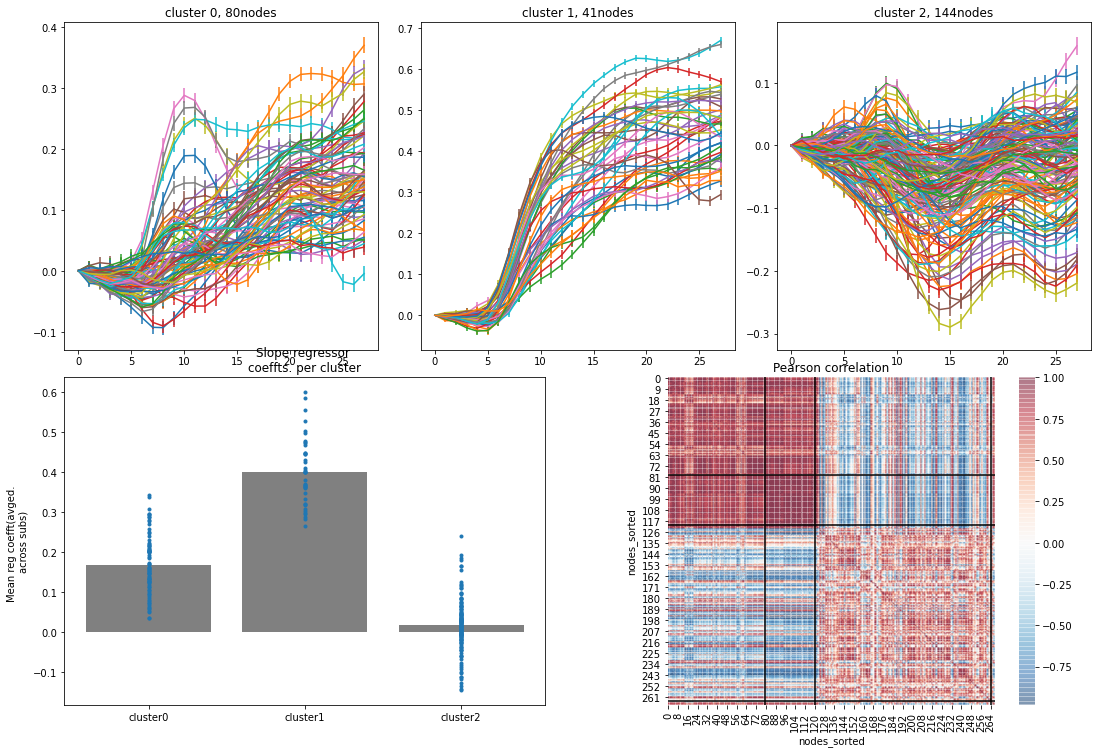

In [30]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 3 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

Movie: Fishing
movie:Fishing
57nodes
71nodes
40nodes
96nodes


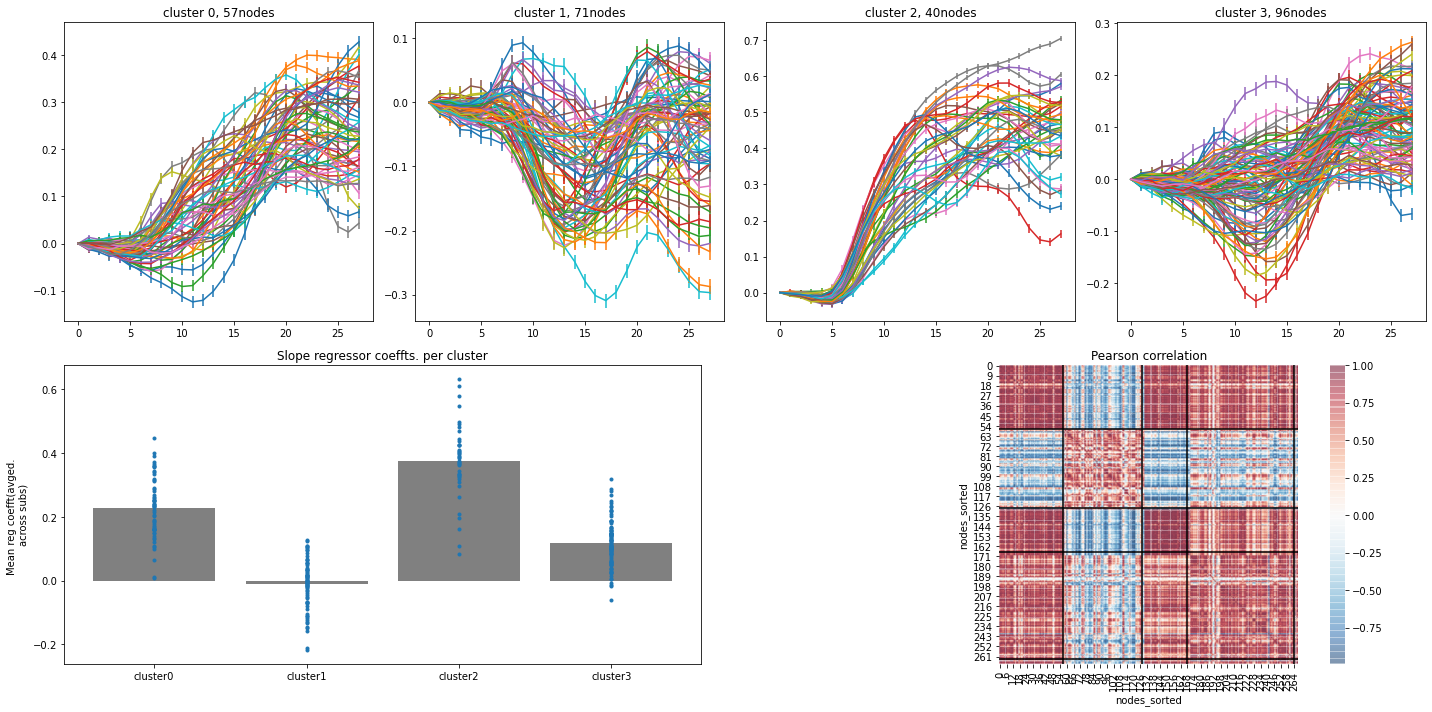

In [36]:
movie_ind = 3# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

Movie: Random mechanical
movie:Random mechanical
64nodes
41nodes
106nodes
53nodes


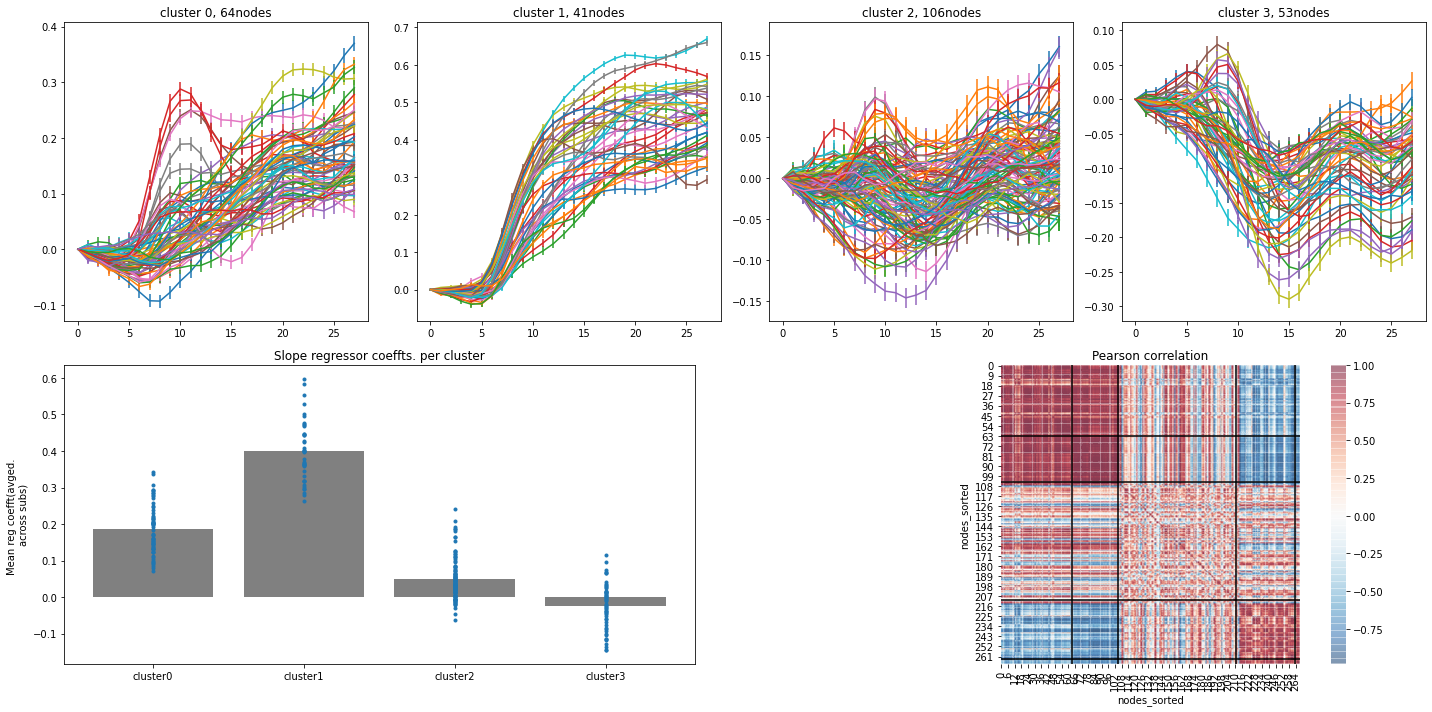

In [37]:
movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

Movie: Random mechanical
movie:Random mechanical
60nodes
20nodes
106nodes
53nodes
24nodes


<ipython-input-35-68a511ef40ff>:73: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


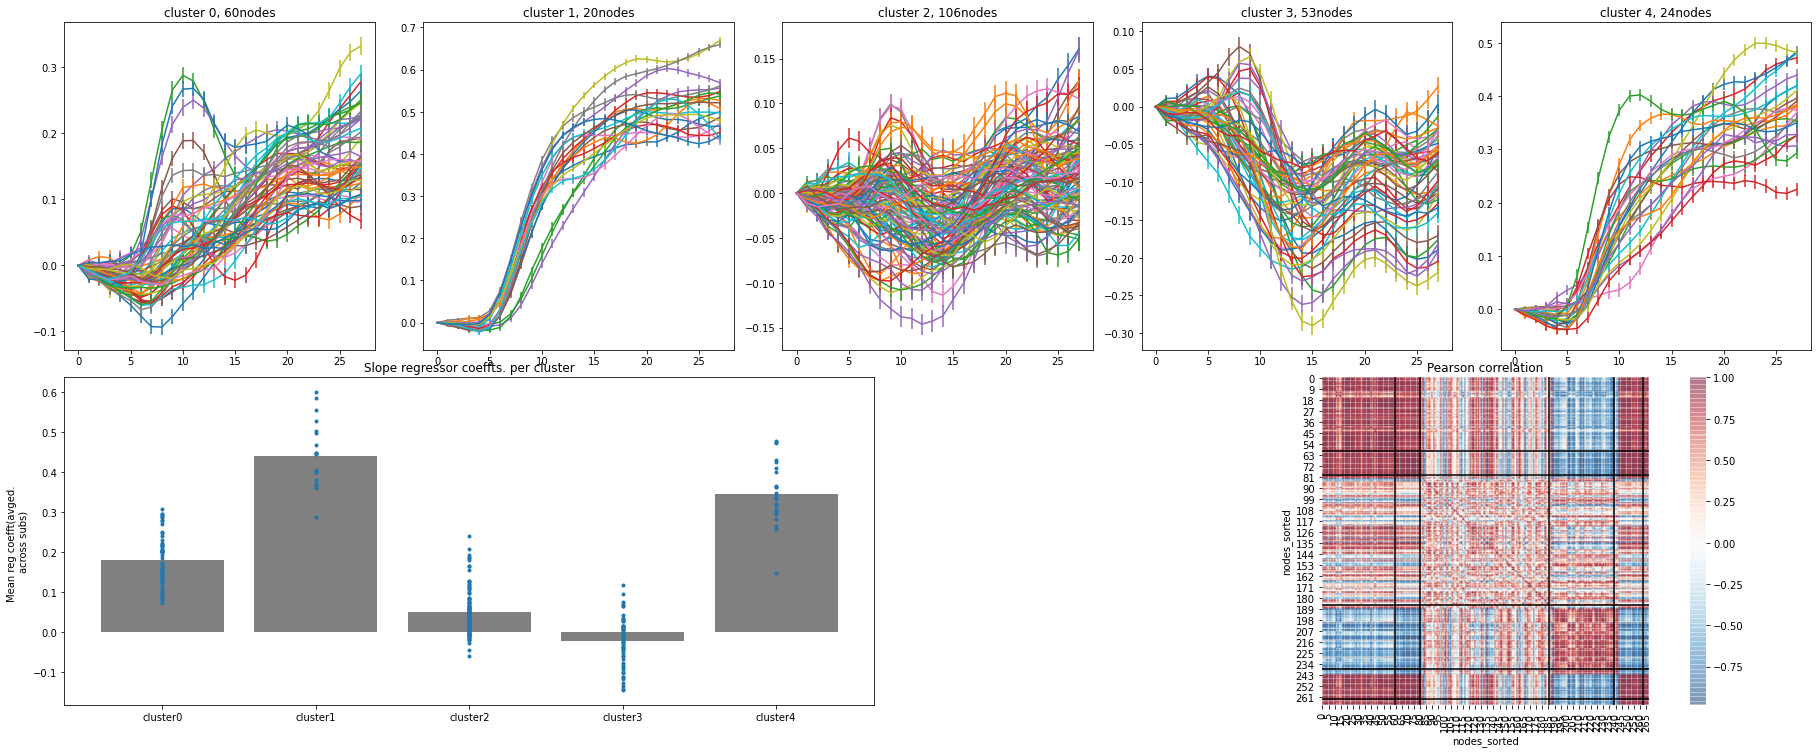

In [38]:
movie_ind = 4 # CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 5 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

Movie: Random mechanical
movie:Random mechanical
54nodes
20nodes
22nodes
20nodes
11nodes
42nodes
17nodes
36nodes
3nodes
33nodes


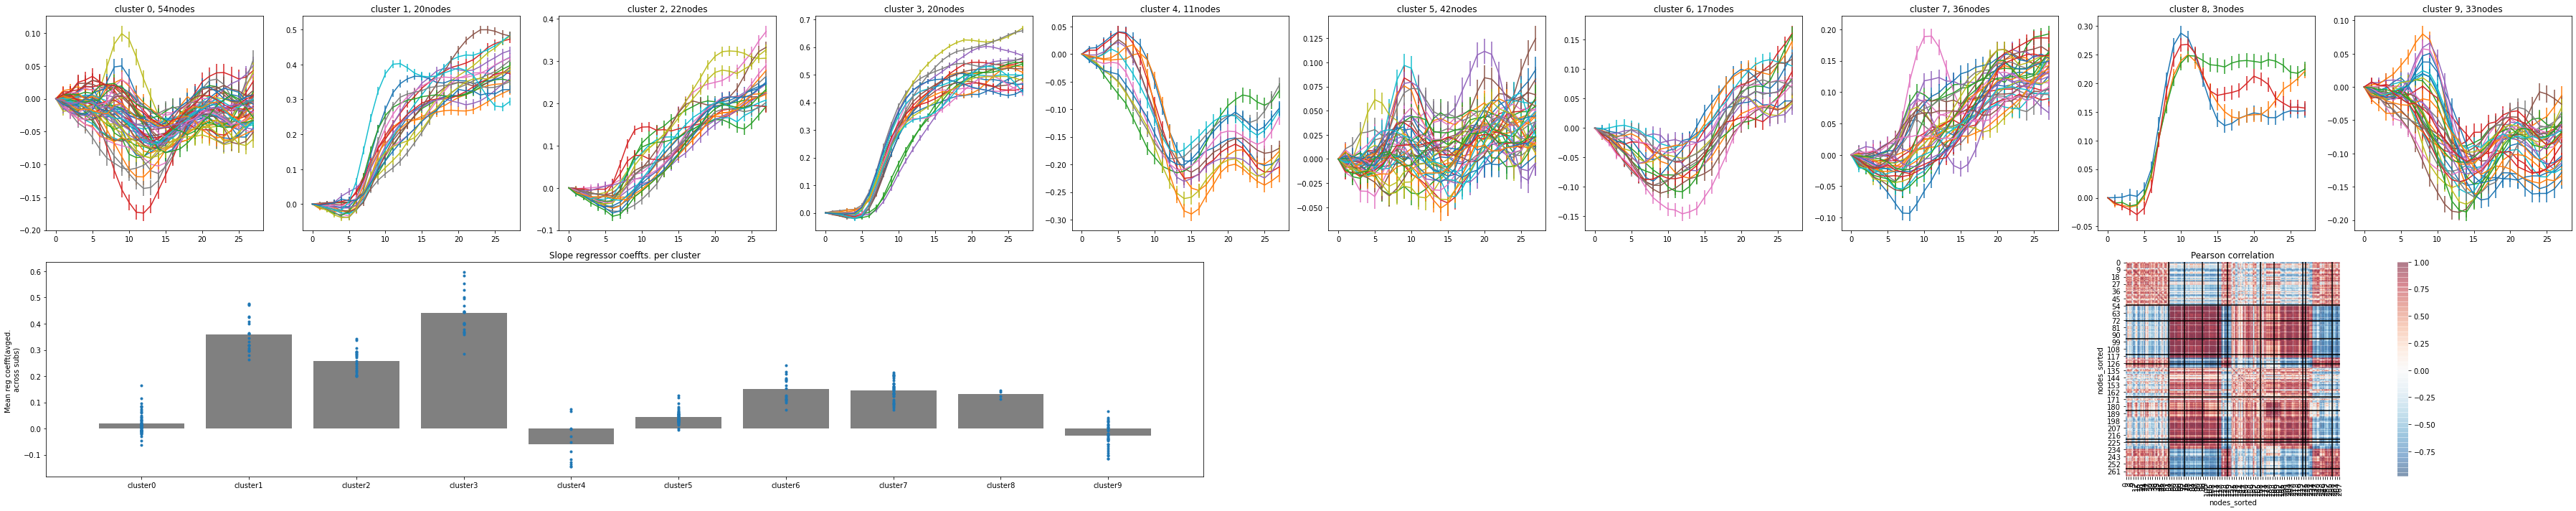

In [39]:
movie_ind = 4 # CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 10 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind)

In [47]:
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
for movie_ind in range(10):
    #movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
    print('Movie:',vidnames[movie_ind])
    X,movieTC = get_training_instances_matrix(movie_ind)
    labels = cluster_node_timecourses(X,nclusters,0)
    plot_timecourses(labels,movieTC, movie_ind)
    plt.savefig(os.path.join(data_file_loc,'figures',f'tc_{nclusters}clus_{movie_ind}{str.upper(vidnames[movie_ind][:4])}.png'))  
    print('saving...')
    plt.close()

Movie: COAXING-B
movie:COAXING-B
90nodes
48nodes
45nodes
81nodes
Movie: BILLIARD-A
movie:BILLIARD-A
110nodes
37nodes
49nodes
68nodes
Movie: DRIFTING-A
movie:DRIFTING-A
104nodes
33nodes
88nodes
39nodes
Movie: Fishing
movie:Fishing
57nodes
71nodes
40nodes
96nodes
Movie: Random mechanical
movie:Random mechanical
64nodes
41nodes
106nodes
53nodes
Movie: Scaring
movie:Scaring
68nodes
52nodes
40nodes
104nodes
Movie: SEDUCING-B
movie:SEDUCING-B
110nodes
45nodes
49nodes
60nodes
Movie: STAR-A
movie:STAR-A
67nodes
74nodes
40nodes
83nodes
Movie: SURPRISING-B
movie:SURPRISING-B
49nodes
99nodes
72nodes
44nodes
Movie: TENNIS-A
movie:TENNIS-A
98nodes
33nodes
37nodes
96nodes


#### 3.2 Plotting response-based curves - run first cell

For each cluster, plotting means across all subs, yes/no subs and a difference. Didn't do any further analyses on this since the clustering itself was imperfect.

In [18]:
# RUN THIS CELL
#load behavioral responses
responses_slopereg = np.load(os.path.join(data_file_loc,'responses_slopereg.npy'))
responses_slopereg.shape

# get yes/no indices
resp_yes = responses_slopereg[:,movie_ind] == 1
resp_no = responses_slopereg[:,movie_ind] == 0
resp_unsure = responses_slopereg[:,movie_ind] == 9
resp_any = (responses_slopereg[:,movie_ind] == 0)| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

# mean timecourses across yes/no responders for a certain movie (defined in the previous node)
meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:],axis = 0) # nodes, timepts
meanTimecourse_yes = np.mean(movieTC[resp_yes,:,:],axis = 0) # nodes, timepts
meanTimecourse_no = np.mean(movieTC[resp_no,:,:],axis = 0) # nodes, timepts
meanTimecourse_unsure= np.mean(movieTC[resp_unsure,:,:],axis = 0) # nodes, timepts

In [185]:

# to save mean timecourses for each cluster, and for yes/no responses
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
    
for movie_ind in range(10):
    #movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
    print('Movie:',vidnames[movie_ind])
    
    X,movieTC = get_training_instances_matrix(movie_ind)
    labels = cluster_node_timecourses(X,nclusters,0)

    plt.figure(movie_ind+1,figsize = (10,8))
    plt.suptitle(vidnames[movie_ind], fontsize=12, fontweight = 'bold')
    
    # get yes/no indices
    resp_yes = responses_slopereg[:,movie_ind] == 1
    resp_no = responses_slopereg[:,movie_ind] == 0
    resp_unsure = responses_slopereg[:,movie_ind] == 9
    resp_any = (responses_slopereg[:,movie_ind] != -1) #| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

    # mean timecourses across yes/no responders for a certain movie (defined in the previous node)
    meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:]   ,axis = 0) # nodes, timepts
    meanTimecourse_yes     = np.mean(movieTC[resp_yes,:,:]   ,axis = 0) # nodes, timepts
    meanTimecourse_no      = np.mean(movieTC[resp_no,:,:]    ,axis = 0) # nodes, timepts
    meanTimecourse_unsure  = np.mean(movieTC[resp_unsure,:,:],axis = 0) # nodes, timepts
    
    nyes = len(np.where(resp_yes)[0])
    nno = len(np.where(resp_no)[0])
    nunsure = len(np.where(resp_unsure)[0])
    nall = nyes+nno+nunsure

    for clus in range(len(np.unique(labels))):
        #del meanTimecourse
        nodes_subset = list(np.where(labels==clus)[0])
        
        nt = meanTimecourse_anyresp.shape[1]
        tscore,pval = np.zeros((nt,)),np.zeros((nt,))#ntimepts,ntimepts
        for i in np.arange(1,meanTimecourse_yes.shape[1]):
            tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])


        plt.subplot(3,len(np.unique(labels)) , clus+1)
        plt.title('cluster' + str(clus) + ',nodes=' + str(len(nodes_subset)))
        plt.errorbar(range(nt), np.mean(meanTimecourse_anyresp[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_anyresp[nodes_subset,:],axis=0), 
                     color = 'k', label = 'AnyResp,n='+ str(nall))
        #plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1,label = 'p<.05')
        plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')

        plt.ylim(-.2,.6)
        #plt.xlabel('Image Nr.')
        if clus == 0:
            plt.legend()
            plt.ylabel('Mean activity across nodes')

        plt.subplot(3, len(np.unique(labels)), len(np.unique(labels))+clus+1)
        plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
        plt.errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes,n='+str(nyes))
        plt.errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No,n='+str(nno))
        plt.errorbar(range(meanTimecourse_unsure[nodes_subset,:].shape[1]), np.mean(meanTimecourse_unsure[nodes_subset,:],axis=0), 
                     stats.sem(meanTimecourse_unsure[nodes_subset,:],axis=0), color = 'g', label = 'Unsure,n='+str(nunsure))
        plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1)#,label = 'p<.05')
        plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')
        #plt.xlabel('Image Nr.')
        if clus == 0:
            plt.ylabel('Mean activity across nodes')
            plt.legend()

        #print(len(range(meanTimecourse_yes.shape[1]))
        plt.subplot(3, len(np.unique(labels)), 2*len(np.unique(labels))+clus+1)
        plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
        plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k')
        plt.vlines(np.where(pval<.05)[0],-6,6, alpha =.1,label = 'p<.05')
        plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')

        plt.xlabel('Image Nr.')
        #ax[2,1].set_xlim(0,28)
        #ax[2,1].set_ylim(-3,3)
        if clus == 0:
            plt.ylabel('T-score yes-no')
            plt.legend()

    plt.tight_layout()

    plt.savefig(os.path.join(data_file_loc,'figures',f'meantc_{nclusters}clus_{movie_ind}{str.upper(vidnames[movie_ind][:4])}.png'))  
    plt.close()
    

Movie: COAXING-B
Movie: BILLIARD-A
Movie: DRIFTING-A
Movie: Fishing
Movie: Random mechanical
Movie: Scaring
Movie: SEDUCING-B
Movie: STAR-A
Movie: SURPRISING-B
Movie: TENNIS-A


Movie: Random mechanical


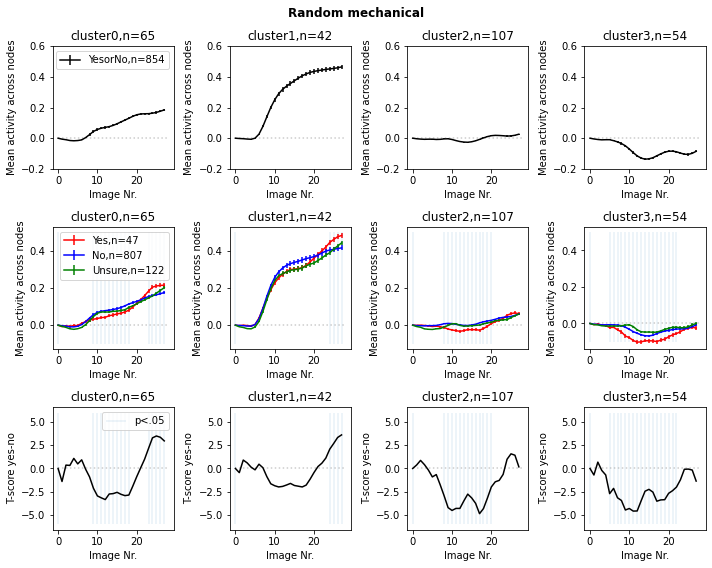

In [71]:
# MAIN FUNCTION TO SAVE THE IMAGES ABOVE. THIS IS ONLY TO SEE FIGURES LOCALLY
# to visualise mean timecourses for each cluster, and for yes/no responses

movie_ind = 4# CHANGE THIS TO THE DESIRED MOVIE IND HERE
print('Movie:',vidnames[movie_ind])
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 4 # CHANGE THIS TO THE NUMBER OF DESIRED CLUSTERS
labels = cluster_node_timecourses(X,nclusters,0)

plt.figure(1,figsize = (10,8))
plt.suptitle(vidnames[movie_ind], fontsize=12, fontweight = 'bold')
for clus in range(len(np.unique(labels))):
    #del meanTimecourse
    nodes_subset = list(np.where(labels==clus)[0])
    tc_yes_or_no = movieTC[resp_yes_or_no,:,:]
    meanTimecourse = np.mean(tc_yes_or_no[:,nodes_subset,:],axis = 0) # nodes within cluster, timepts


    tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
    for i in np.arange(1,meanTimecourse_yes.shape[1]):
        tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
    
    plt.subplot(3,len(np.unique(labels)) , clus+1)
    plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
    nall = meanTimecourse.shape[0]
    plt.errorbar(range(meanTimecourse.shape[1]), np.mean(meanTimecourse,axis=0), stats.sem(meanTimecourse,axis=0), 
                 color = 'k', label = 'YesorNo,n='+str(nyes_no))
    #plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1,label = 'p<.05')
    plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')
    plt.ylabel('Mean activity across nodes')
    plt.ylim(-.2,.6)
    plt.xlabel('Image Nr.')
    if clus == 0:
        plt.legend()
        
    
    
    plt.subplot(3, len(np.unique(labels)), len(np.unique(labels))+clus+1)
    plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
    nyes = len(np.where(resp_yes)[0])
    nno = len(np.where(resp_no)[0])
    nunsure = len(np.where(resp_unsure)[0])
    plt.errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), 
                 stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes,n='+str(nyes))
    plt.errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), 
                 stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No,n='+str(nno))
    plt.errorbar(range(meanTimecourse_unsure[nodes_subset,:].shape[1]), np.mean(meanTimecourse_unsure[nodes_subset,:],axis=0), 
                 stats.sem(meanTimecourse_unsure[nodes_subset,:],axis=0), color = 'g', label = 'Unsure,n='+str(nunsure))
    plt.vlines(np.where(pval<.05)[0],-.1,.5, alpha =.1)#,label = 'p<.05')
    plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')
    plt.ylabel('Mean activity across nodes')
    plt.xlabel('Image Nr.')
    if clus == 0:
        plt.legend()
    
    #print(len(range(meanTimecourse_yes.shape[1]))
    plt.subplot(3, len(np.unique(labels)), 2*len(np.unique(labels))+clus+1)
    plt.title('cluster' + str(clus) + ',n=' + str(len(nodes_subset)))
    plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k')
    plt.vlines(np.where(pval<.05)[0],-6,6, alpha =.1,label = 'p<.05')
    plt.hlines(0,0,28,alpha = .4, color = 'grey', ls = 'dotted')
    plt.ylabel('T-score yes-no')
    plt.xlabel('Image Nr.')
    #ax[2,1].set_xlim(0,28)
    #ax[2,1].set_ylim(-3,3)
    if clus == 0:
        plt.legend()

plt.tight_layout()

### Curve-fitting of nodes

In this section, I explore which curves can best explain the temporal changes of nodes - especially those that show sigmoid shapes, such as cluster 1 in the 3- and 4-cluster conditions show in the figures above. Since cluster 0 in both cases also show a linear trend (special case of sigmoid), I try to fit both clusters with the same function. First I explore two functions' parameters below:
1. sigmoid: y = a / (1. + np.exp(-c * (x - d))) + b
2. logistic_regression: y= A*(1 - (1/ (1+np.exp((x-c)/s)) ))

I also use the lmfit package to fit the curves since it is robust and offers options to initialise, set bounds etc.

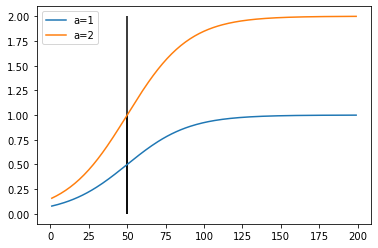

In [72]:
# sigmoid curve properties of parameters
# can explore the effect of a,b,c,d here

def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

x= np.arange(1,200)
a= 1#range
b=0 #y0
c=.05#variance
d=50#centre
plt.plot(x,sigmoid(x, a, b, c, d), label='a='+str(a))
plt.vlines(d,b,b+a,'k')
a *= 2
plt.plot(x,sigmoid(x, a, b, c, d), label='a='+str(a))
plt.vlines(d,b,b+a,'k')

plt.legend()

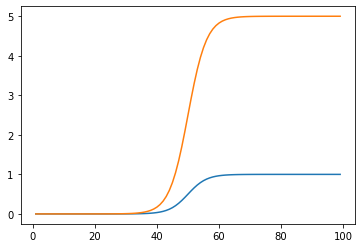

In [19]:
# RUN THIS CELL
# logistic curve properties
# can explore the effect of A,c,s here

def logistic_function(x, A, c, s):
    return A*(1 - (1/ (1+np.exp((x-c)/s)) ))


x= np.arange(1,100)
A= 1#amplitude
c=x[int(len(x)/2)]#centre
s=3#standard dev
plt.plot(x,logistic_function(x, A, c, s))
A = 5
plt.plot(x,logistic_function(x, A, c, s))

##  Curve fitting with lmfit (only the first part which I stopped midway. Main analysis in Characterize_timecourses_functionfits.ipynb

This is the beginning of some curve-fitting I tried to understand the temporal structure within clusters. Fitted nodes within each cluster to the approximate function it likely fit, and compared parameters between yes and no within those clusters. Also tried to fit the same logistic function to both sigmoid and linear (a specific case of sigmoid) clusters. In the end, dropped this one too since clusters are imperfect. 

Instead of defining node functions based on which cluster it belonged to, I now tried various functions for each node and thresholded based on the Rsq and AIC. These were done in Characterize_timecourses_functionfits.ipynb

In [20]:
# RUN THIS CELL
#from lmfit.models import StepModel, RectangleModel, LinearModel
from lmfit import Model

movie:TENNIS-A
98nodes
33nodes
37nodes
96nodes


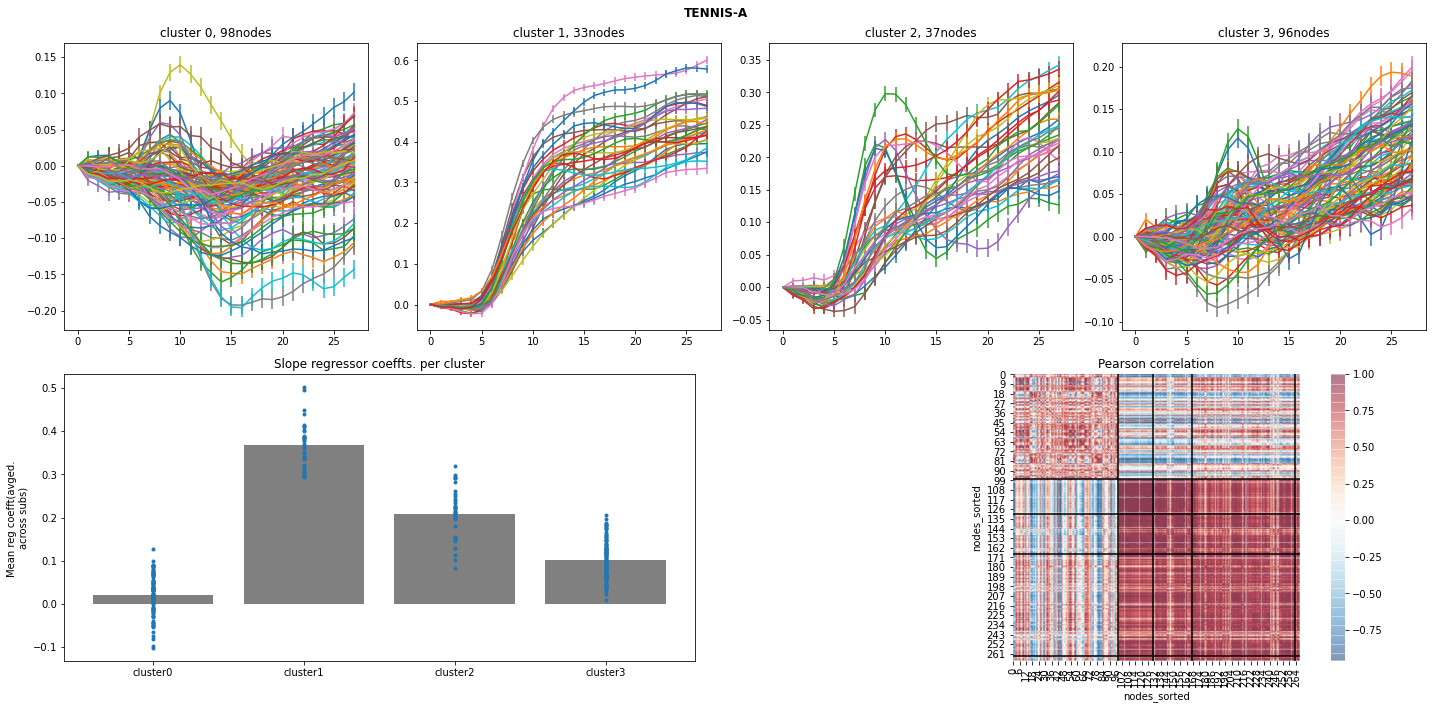

In [75]:
# RUN THIS CELL
# visualize cluster curves here
movie_ind = 9
X,movieTC = get_training_instances_matrix(movie_ind)
nclusters = 4
labels = cluster_node_timecourses(X,nclusters,0)
plot_timecourses(labels,movieTC, movie_ind) # plotting important to select linear and sigmoid clusters

Let's use the 4-cluster models here on. Starting with a list of clusterlabels and function types from eyeballing.
Linear and nonlinear cluster numbers for various movies(since it looks like they all might have similar clusters)
Each row: **moviename**ClusterType1**ClusterLabel,**ClusterType2**ClusterLabel**,ClusterType3**ClusterLabel**...

1. Random mech: Linear: 0, Sigmoid: 1, Sinusoidal:3 , dump:2
2. Fishing:     Linear: 0, Sigmoid: 2, Sinusoidal:1 , dump:-
3. Drifting:    Linear: 2, Sigmoid: 1, Sinusoidal:0 , dump:0

In [21]:
# RUN THIS CELL
linear_clus_labels  = {'0':[0]  ,'1':[0]  ,'2':[2]   ,'3':[0]   ,'4':[0],'5':[0],
                       '6':[3]  ,'7':[0,3],'8':[0,1] ,'9':[2,3]}
sigmoid_clus_labels = {'0':[1]  ,'1':[1,2],'2':[1]   ,'3':[2]   ,'4':[1],'5':[2],
                       '6':[1]  ,'7':[2]  ,'8':[3]   ,'9':[1]}
sin_clus_labels     = {'0':[2,3],'1':[3]  ,'2':[0]   ,'3':[1]   ,'4':[3],'5':[3],
                       '6':[2]  ,'7':[1]  ,'8':[2]   ,'9':[0]}

# print current movie and nr. of parameters
print('Names of clusters currently:', np.unique(labels), ',\nMovie name:',vidnames[movie_ind])

In [173]:
# log cluster ift
def logfit(movie_ind,curveType):
    
    X,movieTC = get_training_instances_matrix(movie_ind)
    
    # get yes/no indices
    resp_yes = responses_slopereg[:,movie_ind] == 1
    resp_no = responses_slopereg[:,movie_ind] == 0
    resp_unsure = responses_slopereg[:,movie_ind] == 9
    resp_any = (responses_slopereg[:,movie_ind] == 0)| (responses_slopereg[:,movie_ind] == 1) | (responses_slopereg[:,movie_ind] == 9)

    # mean timecourses across yes/no responders for a certain movie (defined in the previous node)
    meanTimecourse_anyresp = np.mean(movieTC[resp_any,:,:],axis = 0) # nodes, timepts
    meanTimecourse_yes = np.mean(movieTC[resp_yes,:,:],axis = 0) # nodes, timepts
    meanTimecourse_no = np.mean(movieTC[resp_no,:,:],axis = 0) # nodes, timepts
    meanTimecourse_unsure= np.mean(movieTC[resp_unsure,:,:],axis = 0) # nodes, timepts
    #tc_yes_or_no = movieTC[resp_yes_or_no,:,:]
        
    nyes = len(np.where(resp_yes)[0])
    nno = len(np.where(resp_no)[0])
    nunsure = len(np.where(resp_unsure)[0])
    nall = nyes+nno+nunsure
    
    print('Movie: ', vidnames[movie_ind],'.')

    titles = ['A:amplitude', 'c:center', 's:sigma']

    #fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
    params_yes     = np.zeros((268,len(titles)))
    params_no      = np.zeros_like(params_yes)
    params_unsure  = np.zeros_like(params_yes)
    params_anyresp = np.zeros_like(params_yes)

    unfit = 0
    for node in range(268): # i=rownum, node= actual node nr

        yyes = meanTimecourse_yes[node,:]
        yno = meanTimecourse_no[node,:]
        yunsure = meanTimecourse_unsure[node,:]
        yanyresp = meanTimecourse_anyresp[node,:]
        nt = len(yyes)
        x = np.arange(nt)
        
        try:
            #form = 'logistic'
            #model = StepModel(form=form) + LinearModel()
            model = Model(logistic_function)#,nan_policy = 'omit') # solve this error, add hints etc. in model fits
            model.set_param_hint('A', min=0, max = 2)
            model.set_param_hint('c', min=2, max = 25)
            model.set_param_hint('s', min=1e-10, max = 500)

            params = model.make_params(c=np.argmax(np.diff(yyes)), A = max(yyes)-min(yyes), s = 1)
            result = model.fit(yyes, params, x=x)
            params_yes[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yno)), A = max(yno)-min(yno), s = 1)
            result = model.fit(yno, params, x=x)
            params_no[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yunsure)), A = max(yunsure)-min(yunsure), s = 1)
            result = model.fit(yunsure, params, x=x)
            params_unsure[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

            params = model.make_params(c=np.argmax(np.diff(yanyresp)), A = max(yanyresp)-min(yanyresp), s = 1)
            result = model.fit(yanyresp, params, x=x)
            params_anyresp[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

        except:
            #print("does not fit")
            unfit += 1

    print(unfit,'out of ',i,'nodes were not fit.')
        

    nrows = 4
    ncols = 3
    xwidth = 10
    yheight = 10
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    plt.suptitle(vidnames[movie_ind]+',LinClus',fontweight='bold',fontsize=12)

    t,p = np.zeros((3,)),np.zeros((3,))

    for i in range(3): # params: A,c,s
        r= i
        c= 0
        ax[r,c].hist(params_yes[:,i], color = 'red', alpha = 1, label = 'yes nodes')
        ax[r,c].hist(params_no[:,i], color = 'blue', alpha = 1, label = 'no nodes')
        ax[r,c].hist(params_unsure[:,i], color = 'green', alpha = 1, label = 'unsure nodes')
        ax[r,c].set_title(titles[i])
        ax[r,c].set_ylabel('Number of nodes')
        if r==0:
            ax[r,c].legend()
            '''ax[r,c].set_xlim(0,1)
            ax[r,c].set_ylim(0,30)

        elif r==1:
            ax[r,c].set_xlim(0,28)
            ax[r,c].set_ylim(0,30)

        elif r==2:
            ax[r,c].set_xlim(0,10)
            ax[r,c].set_ylim(0,30)'''



        c=1 # middle column, barplots
        for row in range(len(params_yes[:,i])):
            ax[r,c].plot(range(3),np.array([params_yes[row,i],params_no[row,i],params_unsure[row,i]]), color = 'k', alpha = .2)
        ax[r,c].bar(range(3),np.array([np.mean(params_yes[:,i]),np.mean(params_no[:,i]),np.mean(params_unsure[:,i])]),
                    color = 'grey', label = 'mean value')
        ax[r,c].set_title(titles[i])
        ax[r,c].set_xticks([0,1,2])
        ax[r,c].set_xticklabels(['Yes','No','Unsure'])
        ax[r,c].set_ylabel('Parameter estimates')

        if r==0:
            ax[r,c].legend()
            '''ax[r,c].set_ylim(0,1)

        elif r==1:
            ax[r,c].set_ylim(0,28)

        elif r==2:
            ax[r,c].set_ylim(0,10)'''

        c=2
        n,bins,_ = ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
        ax[r,c].set_title(titles[i])
        t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
        if p[i] < .05:
            ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'solid',
                          label = 'Mean Yes-No,\np<.05')
        else:
            ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'dashed',
                           label = 'Mean Yes-No,\np>=.05')
        ax[r,c].vlines(0,0,max(n),'k', ls = 'dotted', label = 'Yes=No')
        if r== 0:
            ax[r,c].legend(loc = 'upper left')
            '''ax[r,c].set_xlim(-1,1)
            ax[r,c].set_ylim(0,20)

        elif r==1:
            ax[r,c].set_xlim(-20,20)
            ax[r,c].set_ylim(0,30)

        elif r==2:
            ax[r,c].set_xlim(-10,10)
            ax[r,c].set_ylim(0,30)'''


        #ax[r,c].set_xlim(-1.1*max(np.abs(bins)),1.1*max(np.abs(bins)))
        ax[r,c].set_xlabel('Yes-No')
        ax[r,c].set_ylabel('#nodes')
        plt.axis('square')


    for n in nodes_subset:
        ax[3,0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
        ax[3,0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

    #ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
    #ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
    ax[3,0].set_title('Yes and No timecourses for nodes in current cluster ')
    ax[3,0].set_ylabel('Node timecourses')
    ax[3,0].set_xlabel('Image Nr.')
    #ax[3,0].legend()

    tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
    for i in np.arange(1,meanTimecourse_yes.shape[1]):
        tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
    #print(len(range(meanTimecourse_yes.shape[1]))
    plt.subplot(4,3,11)
    plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
    plt.ylabel('T-score yes-no')
    plt.xlabel('Image Nr.')
    #ax[2,1].set_xlim(0,28)
    #ax[2,1].set_ylim(-3,3)

    ax[3,2].axis(False)

    plt.tight_layout()
    
    if curveType == 'linear':
        plt.savefig(os.path.join(data_file_loc,'figures',
                             f'log_paramEst_{movie_ind}{str.upper(vidnames[movie_ind][:4])}_linclust_{cluster_num}.png'))  
    elif curveType == 'nonlinear':
        plt.savefig(os.path.join(data_file_loc,'figures',
                             f'log_paramEst_{movie_ind}{str.upper(vidnames[movie_ind][:4])}_nonlinclust_{cluster_num}.png'))  

    plt.close()
    #print('\nmean:',np.mean(params_yes, axis = 0))
    #print('\nsem:',stats.sem(params_yes, axis = 0))
    #print('\nboth:',np.array([np.mean(params_yes, axis = 0),    stats.sem(params_yes, axis = 0)]))
    
    mean_sem_params_yes     = np.array([np.mean(params_yes, axis = 0),    stats.sem(params_yes, axis = 0)]) # average across nodes in the cluster
    mean_sem_params_no      = np.array([np.mean(params_no, axis = 0),     stats.sem(params_no,axis=0)])
    mean_sem_params_unsure  = np.array([np.mean(params_unsure, axis = 0), stats.sem(params_unsure,axis=0)])
    mean_sem_params_anyresp = np.array([np.mean(params_anyresp, axis = 0),stats.sem(params_anyresp,axis=0)])
    
    return mean_sem_params_yes, mean_sem_params_no, mean_sem_params_unsure, mean_sem_params_anyresp


In [142]:
df_lin = pd.DataFrame(columns =['Movie_ind', 'Cluster', 'AYes','cYes','sYes','ANo','cNo','sNo', \
                                                'AUnsure','cUnsure','sUnsure']) 

for movie_ind in range(10): # list of movies
    for cluster_num in linear_clus_labels[str(movie_ind)]: # linear clusters within movie
        params_yes, params_no, params_unsure, params_anyresp = logfit(movie_ind,cluster_num,'linear') 
        #print( [movie_ind,cluster_num,params_yes,params_no,params_yes_no])
        params_yes = params_yes.T
        params_no = params_no.T
        params_unsure = params_unsure.T
        
        new_row = pd.DataFrame({'Movie_ind':movie_ind,'Cluster': cluster_num,
                                'AYes':params_yes[0,0],'cYes':params_yes[1,0],'sYes':params_yes[2,0],
                                'ANo':params_no[0,0], 'cNo':params_no[1,0],'sNo':params_no[2,0],
                                'AUnsure':params_unsure[0,0],'cUnsure':params_unsure[1,0],'sUnsure':params_unsure[2,0],
                                'AYes_sem':params_yes[0,1],'cYes_sem':params_yes[1,1],'sYes_sem':params_yes[2,1],
                                'ANo_sem':params_no[0,1],'cNo_sem':params_no[1,1],'sNo_sem':params_no[2,1],
                                'AUnsure_sem':params_unsure[0,1],'cUnsure_sem':params_unsure[1,1],
                                'sUnsure_sem':params_unsure[2,1] },index = [0])
        df_lin = pd.concat([df_lin, new_row], ignore_index=True)
        
        '''movie_ind_per_clus.append([movie_ind]
        cluster.append(cluster_num)
            
        A_yes[nclus],c_yes[nclus],s_yes[nclus] = params_yes
        A_no[nclus],c_no[nclus],s_no[nclus] = params_no
        A_yes[nclus],c_yes[nclus],s_yes[nclus] = params_yes_no'''
df_lin.head()

cluster:  0 , movie:  COAXING-B .
0 out of  90 nodes were not fit.
cluster:  0 , movie:  BILLIARD-A .
0 out of  110 nodes were not fit.
cluster:  2 , movie:  DRIFTING-A .
0 out of  88 nodes were not fit.
cluster:  0 , movie:  Fishing .
0 out of  57 nodes were not fit.
cluster:  0 , movie:  Random mechanical .
0 out of  64 nodes were not fit.
cluster:  0 , movie:  Scaring .
0 out of  68 nodes were not fit.
cluster:  3 , movie:  SEDUCING-B .
0 out of  60 nodes were not fit.
cluster:  0 , movie:  STAR-A .
0 out of  67 nodes were not fit.
cluster:  3 , movie:  STAR-A .
0 out of  83 nodes were not fit.
cluster:  0 , movie:  SURPRISING-B .
0 out of  49 nodes were not fit.
cluster:  1 , movie:  SURPRISING-B .
0 out of  99 nodes were not fit.
cluster:  2 , movie:  TENNIS-A .
0 out of  37 nodes were not fit.
cluster:  3 , movie:  TENNIS-A .
0 out of  96 nodes were not fit.


Movie_ind Cluster      AYes       cYes      sYes       ANo        cNo  \
0         0       0  0.205667  14.045195  1.729893  0.288499  14.994046   
1         1       0  0.171833  12.784285  8.902392  0.160074  13.670385   
2         2       2  0.127988  16.689688  2.244954  0.126080  16.488161   
3         3       0  0.261675  14.589855  2.204406  0.270953  13.208642   
4         4       0  0.236839  16.224864  2.409360  0.167582  13.432039   

        sNo   AUnsure    cUnsure  ...  sAll  AYes_sem  cYes_sem  sYes_sem  \
0  4.489046  0.142023  15.455163  ...   NaN  0.008445  0.412242  0.091911   
1  2.380578  0.177849  12.953560  ...   NaN  0.011451  0.592769  4.641803   
2  2.194077  0.159655  13.585081  ...   NaN  0.008578  0.568396  0.599323   
3  2.330363  0.271307  14.036541  ...   NaN  0.012871  0.511813  0.186758   
4  1.979198  0.192772  15.483559  ...   NaN  0.011797  0.477324  0.183660   

    ANo_sem   cNo_sem   sNo_sem  AUnsure_sem  cUnsure_sem  sUnsure_sem  
0  0.019172  0.516721  1.214778     0.012153     0.556634     0.807829  
1  0.005064  0.406190  0.147277     0.009565     0.669755     0.307191  
2  0.005716  0.516468  0.189066     0.009773     0.829790     5.606166  
3  0.009665  0.459505  0.178390     0.014486     0.616921     0.290746  
4  0.007229  0.479566  0.156107     0.010176     0.618601     0.219049  

[5 rows x 23 columns]

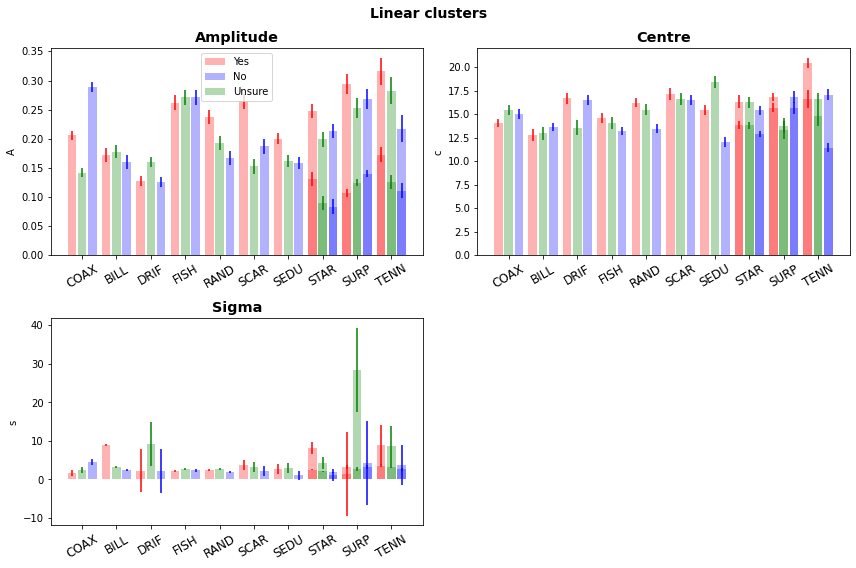

In [172]:
plt.figure(1,figsize = (12,8))
plt.suptitle('Linear clusters',fontweight = 'bold',fontsize=14)

df1 = df_lin.loc[:,["AYes", "ANo", "AUnsure","AYes_sem", "ANo_sem", "AUnsure_sem", "Movie_ind"]]
#df1 = df1.set_index("Movie_ind")
plt.subplot(2,2,1)
plt.bar(df1["Movie_ind"]-.3,df1["AYes"],label="Yes", color ='r', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["ANo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["AUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, y=df1["AYes"], yerr=df1["AYes_sem"], color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, y=df1["ANo"], yerr=df1["AYes_sem"],color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], y=df1["AUnsure"], yerr=df1["AYes_sem"],color ='g', linestyle='None')

lbls = [str.upper(i[:4]) for i in vidnames]
plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.ylabel('A')
#df1.head(20)
plt.title('Amplitude', fontweight='bold',fontsize ='x-large')
plt.legend()

del df1
df1 = df_lin.loc[:,["cYes", "cNo", "cUnsure","cYes_sem", "cNo_sem", "cUnsure_sem", "Movie_ind"]]
plt.subplot(2,2,2)
plt.bar(df1["Movie_ind"]-.3,df1["cYes"],label="Yes", color ='r', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["cNo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["cUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, df1["cYes"], df1["cYes_sem"],label="Yes", color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, df1["cNo"], df1["cNo_sem"],label="No", color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], df1["cUnsure"], df1["cUnsure_sem"],label="Unsure", color ='g', linestyle='None')



plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.ylabel('c')
plt.title('Centre', fontweight='bold',fontsize ='x-large')
#df1.head(20)

del df1
df1 = df_lin.loc[:,["sYes", "sNo", "sUnsure","sYes_sem", "sNo_sem", "sUnsure_sem", "Movie_ind"]]
plt.subplot(2,2,3)
plt.bar(df1["Movie_ind"]-.3,df1["sYes"],label="Yes", color ='r', width = -.25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["sNo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["sUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, df1["sYes"], df1["sUnsure_sem"],label="Yes", color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, df1["sNo"], df1["sUnsure_sem"],label="No", color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], df1["sUnsure"], df1["sUnsure_sem"],label="Unsure", color ='g', linestyle='None')



plt.ylabel('s')
plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.title('Sigma', fontweight='bold',fontsize ='x-large')
#df1.head(20)

plt.tight_layout()

In [166]:
linear_clus_labels

{'0': [0],
 '1': [0],
 '2': [2],
 '3': [0],
 '4': [0],
 '5': [0],
 '6': [3],
 '7': [0, 3],
 '8': [0, 1],
 '9': [2, 3]}

In [174]:
df_nonlin = pd.DataFrame(columns =['Movie_ind', 'Cluster', 'AYes','cYes','sYes'\
                                                  , 'ANo','cNo','sNo', \
                                                'ABoth','cBoth','sBoth']) 

for movie_ind in range(10): # list of movies
    for cluster_num in sigmoid_clus_labels[str(movie_ind)]: # linear clusters within movie
        params_yes, params_no, params_unsure, params_anyresp = logfit(movie_ind,cluster_num,'nonlinear') 
        #print( [movie_ind,cluster_num,params_yes,params_no,params_yes_no])
        params_yes = params_yes.T
        params_no = params_no.T
        params_unsure = params_unsure.T
        
        new_row = pd.DataFrame({'Movie_ind':movie_ind,'Cluster': cluster_num,
                                'AYes':params_yes[0,0],'cYes':params_yes[1,0],'sYes':params_yes[2,0],
                                'ANo':params_no[0,0], 'cNo':params_no[1,0],'sNo':params_no[2,0],
                                'AUnsure':params_unsure[0,0],'cUnsure':params_unsure[1,0],'sUnsure':params_unsure[2,0],
                                'AYes_sem':params_yes[0,1],'cYes_sem':params_yes[1,1],'sYes_sem':params_yes[2,1],
                                'ANo_sem':params_no[0,1],'cNo_sem':params_no[1,1],'sNo_sem':params_no[2,1],
                                'AUnsure_sem':params_unsure[0,1],'cUnsure_sem':params_unsure[1,1],
                                'sUnsure_sem':params_unsure[2,1] },index = [0])
        df_nonlin = pd.concat([df_nonlin, new_row], ignore_index=True)
        
        '''movie_ind_per_clus.append([movie_ind]
        cluster.append(cluster_num)
            
        A_yes[nclus],c_yes[nclus],s_yes[nclus] = params_yes
        A_no[nclus],c_no[nclus],s_no[nclus] = params_no
        A_yes[nclus],c_yes[nclus],s_yes[nclus] = params_yes_no'''
        
df_nonlin.head()

cluster:  1 , movie:  COAXING-B .
0 out of  48 nodes were not fit.
cluster:  1 , movie:  BILLIARD-A .
0 out of  37 nodes were not fit.
cluster:  2 , movie:  BILLIARD-A .
0 out of  49 nodes were not fit.
cluster:  1 , movie:  DRIFTING-A .
0 out of  33 nodes were not fit.
cluster:  2 , movie:  Fishing .
0 out of  40 nodes were not fit.
cluster:  1 , movie:  Random mechanical .
0 out of  41 nodes were not fit.
cluster:  2 , movie:  Scaring .
0 out of  40 nodes were not fit.
cluster:  1 , movie:  SEDUCING-B .
0 out of  45 nodes were not fit.
cluster:  2 , movie:  STAR-A .
0 out of  40 nodes were not fit.
cluster:  3 , movie:  SURPRISING-B .
0 out of  44 nodes were not fit.
cluster:  1 , movie:  TENNIS-A .
0 out of  33 nodes were not fit.


Movie_ind Cluster      AYes       cYes      sYes       ANo        cNo  \
0         0       1  0.406992  11.605521  1.883313  0.462076  13.130899   
1         1       1  0.463295  10.726193  2.033485  0.477134  10.719603   
2         1       2  0.293978  12.109654  2.739486  0.262529  12.308344   
3         2       1  0.427988  11.493090  2.542378  0.447253  10.708272   
4         3       2  0.462409  10.797010  2.057393  0.478250  10.755236   

        sNo ABoth cBoth  ...   sUnsure  AYes_sem  cYes_sem  sYes_sem  \
0  2.241232   NaN   NaN  ...  1.318740  0.019091  0.485512  0.200698   
1  1.971407   NaN   NaN  ...  2.231719  0.017385  0.222416  0.106231   
2  2.055840   NaN   NaN  ...  3.226755  0.014202  0.517915  0.341196   
3  2.339260   NaN   NaN  ...  2.681414  0.015813  0.413749  0.120320   
4  1.993957   NaN   NaN  ...  2.154026  0.012690  0.357698  0.144906   

    ANo_sem   cNo_sem   sNo_sem  AUnsure_sem  cUnsure_sem  sUnsure_sem  
0  0.022634  0.491600  0.266619     0.018083     0.343910     0.147436  
1  0.012856  0.199505  0.087325     0.013977     0.219995     0.118952  
2  0.006316  0.309864  0.098545     0.010745     0.415979     0.235970  
3  0.012309  0.302722  0.112746     0.012198     0.260939     0.147694  
4  0.012343  0.287658  0.127546     0.013128     0.389970     0.178335  

[5 rows x 23 columns]

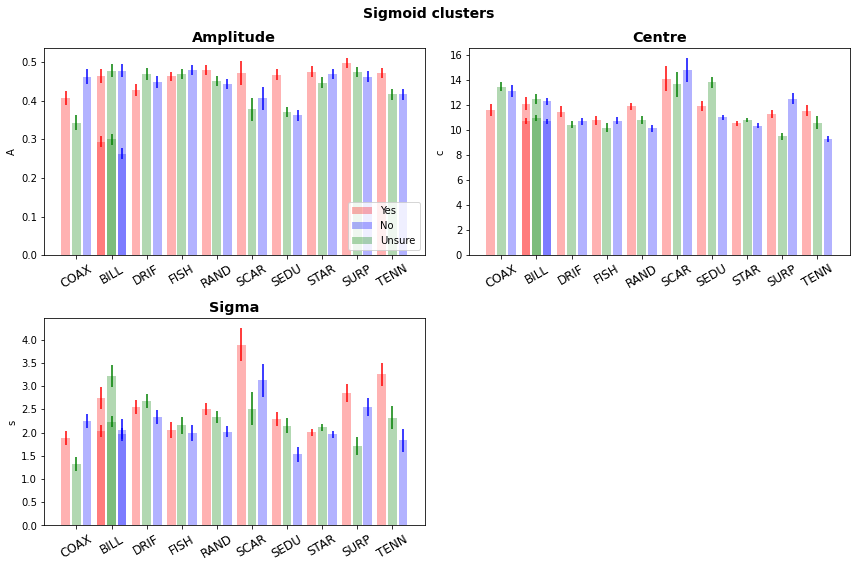

In [171]:
plt.figure(1,figsize = (12,8))
plt.suptitle('Sigmoid clusters',fontweight = 'bold',fontsize=14)
df1 = df_nonlin.loc[:,["AYes", "ANo", "AUnsure","AYes_sem", "ANo_sem", "AUnsure_sem", "Movie_ind"]]
#df1 = df1.set_index("Movie_ind")
plt.subplot(2,2,1)
plt.bar(df1["Movie_ind"]-.3,df1["AYes"],label="Yes", color ='r', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["ANo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["AUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, y=df1["AYes"], yerr=df1["AYes_sem"], color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, y=df1["ANo"], yerr=df1["AYes_sem"],color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], y=df1["AUnsure"], yerr=df1["AYes_sem"],color ='g', linestyle='None')

lbls = [str.upper(i[:4]) for i in vidnames]
plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.ylabel('A')
#df1.head(20)
plt.title('Amplitude', fontweight='bold',fontsize ='x-large')
plt.legend()

del df1
df1 = df_nonlin.loc[:,["cYes", "cNo", "cUnsure","cYes_sem", "cNo_sem", "cUnsure_sem", "Movie_ind"]]
plt.subplot(2,2,2)
plt.bar(df1["Movie_ind"]-.3,df1["cYes"],label="Yes", color ='r', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["cNo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["cUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, df1["cYes"], df1["cYes_sem"],label="Yes", color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, df1["cNo"], df1["cNo_sem"],label="No", color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], df1["cUnsure"], df1["cUnsure_sem"],label="Unsure", color ='g', linestyle='None')



plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.ylabel('c')
plt.title('Centre', fontweight='bold',fontsize ='x-large')
#df1.head(20)

del df1
df1 = df_nonlin.loc[:,["sYes", "sNo", "sUnsure","sYes_sem", "sNo_sem", "sUnsure_sem", "Movie_ind"]]
plt.subplot(2,2,3)
plt.bar(df1["Movie_ind"]-.3,df1["sYes"],label="Yes", color ='r', width = -.25, alpha =.3)
plt.bar(df1["Movie_ind"]+.3,df1["sNo"],label="No", color='b', width = .25, alpha =.3)
plt.bar(df1["Movie_ind"],df1["sUnsure"],label="Unsure", color='g', width = .25, alpha =.3)
plt.errorbar(df1["Movie_ind"]-.3, df1["sYes"], df1["sUnsure_sem"],label="Yes", color ='r', linestyle='None')
plt.errorbar(df1["Movie_ind"]+.3, df1["sNo"], df1["sUnsure_sem"],label="No", color ='b', linestyle='None')
plt.errorbar(df1["Movie_ind"], df1["sUnsure"], df1["sUnsure_sem"],label="Unsure", color ='g', linestyle='None')



plt.ylabel('s')
plt.xticks(range(10),lbls, rotation = 30, fontsize=12)
plt.title('Sigma', fontweight='bold',fontsize ='x-large')
#df1.head(20)

plt.tight_layout()

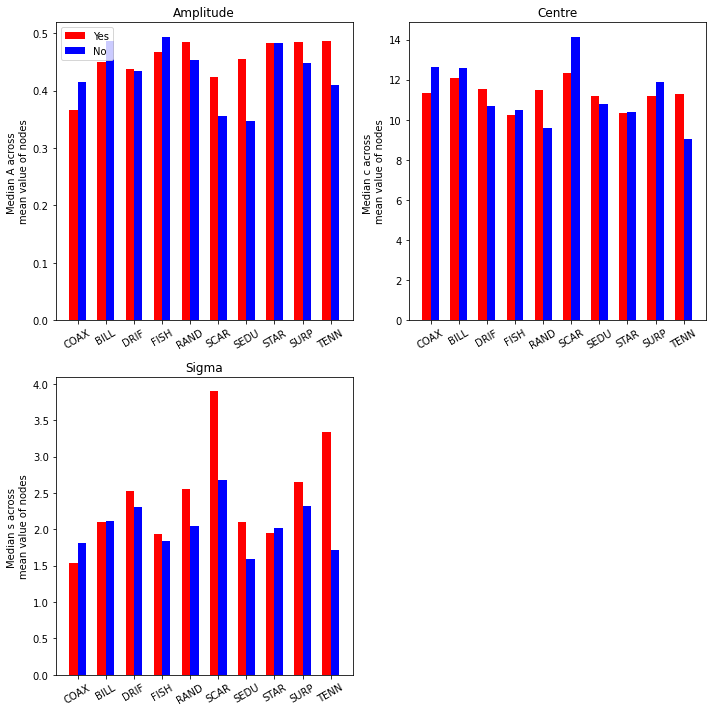

In [47]:
plt.figure(1,figsize = (10,10))
df1 = df_nonlin.loc[:,["AYes", "ANo","Movie_ind"]]
#df1 = df1.set_index("Movie_ind")
plt.subplot(2,2,1)
plt.bar(df1["Movie_ind"],df1["AYes"],label="Yes", color ='r', width = -.3, align = 'edge')
plt.bar(df1["Movie_ind"],df1["ANo"],label="No", color='b', width = .3, align = 'edge')
lbls = [str.upper(i[:4]) for i in vidnames]
plt.xticks(range(10),lbls, rotation = 30)
plt.ylabel('Median A across \nmean value of nodes')
#df1.head(20)
plt.title('Amplitude')
plt.legend()

df1 = df_nonlin.loc[:,["cYes", "cNo","Movie_ind"]]
plt.subplot(2,2,2)
plt.bar(df1["Movie_ind"],df1["cYes"],label="Yes", color ='r', width = -.3, align = 'edge')
plt.bar(df1["Movie_ind"],df1["cNo"],label="No", color='b', width = .3, align = 'edge')
plt.xticks(range(10),lbls, rotation = 30)
plt.ylabel('Median c across \nmean value of nodes')
plt.title('Centre')
#df1.head(20)

df1 = df_nonlin.loc[:,["sYes", "sNo","Movie_ind"]]
plt.subplot(2,2,3)
plt.bar(df1["Movie_ind"],df1["sYes"],label="Yes", color ='r', width = -.3, align = 'edge')
plt.bar(df1["Movie_ind"],df1["sNo"],label="No", color='b', width = .3, align = 'edge')
plt.ylabel('Median s across \nmean value of nodes')
plt.xticks(range(10),lbls, rotation = 30)
plt.title('Sigma')
#df1.head(20)

plt.tight_layout()

parameter names: ['amplitude', 'frequency', 'shift']
independent variables: ['x']
['amplitude', 'frequency', 'shift']
0 out of  106 nodes


No handles with labels found to put in legend.


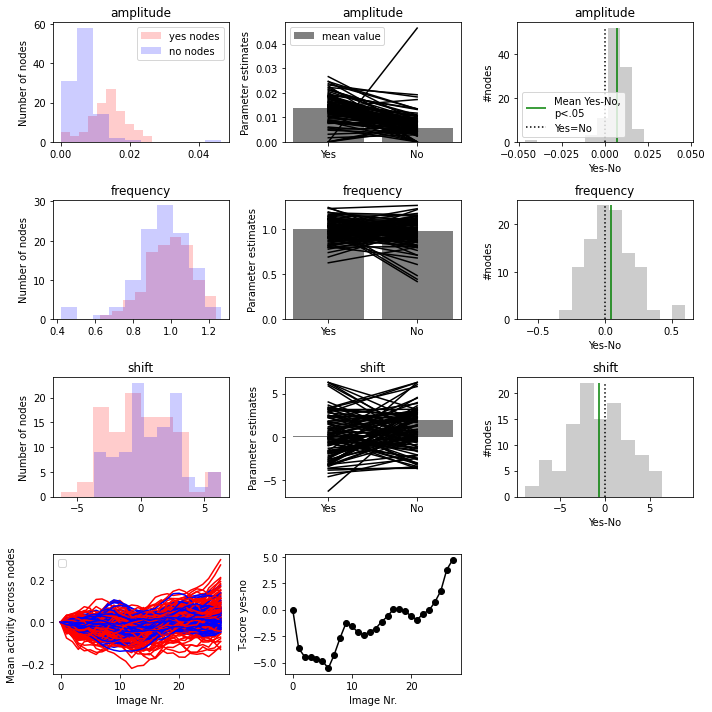

In [66]:
from lmfit.models import SineModel


nodes_subset = np.where(labels==2)[0]

r2 = 1000.0+np.zeros_like(nodes_subset)

model = SineModel() #,nan_policy = 'omit') # solve this error, add hints etc. in model fits
print('parameter names: {}'.format(model.param_names))
print('independent variables: {a}'.format(model.independent_vars))

titles = model.param_names
print(titles)

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
params_yes = np.zeros((len(nodes_subset),3))
params_no  = np.zeros((len(nodes_subset),3))

unfit = 0
for i,node in enumerate(nodes_subset):
    #row = int(np.floor(i/ncols))
    #col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))
    #plt.plot(range(28),yyes)
    try:
            #print(i)  
            #form = 'logistic'
            #model = StepModel(form=form) + LinearModel()
        
        params = model.make_params(amplitude=1)
        result = model.fit(yyes, params, x=x)
        params_yes[i,:] = np.array([result.best_values['amplitude'], result.best_values['frequency'], result.best_values['shift']])

        params = model.make_params(amplitude=1)
        result = model.fit(yno, params, x=x)
        params_no[i,:] = np.array([result.best_values['amplitude'], result.best_values['frequency'], result.best_values['shift']])

    except:
        #print("does not fit")
        unfit += 1
    
print(unfit,'out of ',i,'nodes')
    

    
nrows = 4
ncols = 3
xwidth = 10
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((3,)),np.zeros((3,))

for i in range(3):
    r= i
    c= 0
    ax[r,c].hist(params_yes[:,i], color = 'red', alpha = .2, label = 'yes nodes')
    ax[r,c].hist(params_no[:,i], color = 'blue', alpha = .2, label = 'no nodes')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_ylabel('Number of nodes')
    if r==0:
        ax[r,c].legend()
        #ax[r,c].text(2, 10,str.upper(vidnames[movie_ind])[:4], fontsize=16, color = 'red')
    
    
    c=1
    for row in range(len(params_yes[:,i])):
        ax[r,c].plot(range(2),np.array([params_yes[row,i],params_no[row,i]]), color = 'k')
    ax[r,c].bar(range(2),np.array([np.mean(params_yes[:,i]),np.mean(params_no[row,i])]),
                color = 'grey', label = 'mean value')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_xticks([0,1])
    ax[r,c].set_xticklabels(['Yes','No'])
    ax[r,c].set_ylabel('Parameter estimates')
    if r==0:
        ax[r,c].legend()

    c=2
    n,bins,_ = ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
    ax[r,c].set_title(titles[i])
    t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
    if p[i] < .05:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'solid',
                      label = 'Mean Yes-No,\np<.05')
    else:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,(n),'g', ls = 'dashed',
                       label = 'Mean Yes-No,\np>=.05')
    ax[r,c].vlines(0,0,max(n),'k', ls = 'dotted', label = 'Yes=No')
    if r== 0:
        ax[r,c].legend(loc = 'lower left')

    ax[r,c].set_xlim(-1.1*max(np.abs(bins)),1.1*max(np.abs(bins)))
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
    
for n in nodes_subset:
    ax[3,0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
    ax[3,0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

#ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
#ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[3,0].set_ylabel('Mean activity across nodes')
ax[3,0].set_xlabel('Image Nr.')
ax[3,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(4,3,11)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)

ax[3,2].axis(False)

plt.tight_layout()



parameter names: ['A', 'c', 's']
independent variables: ['x']
0 out of  41 nodes


No handles with labels found to put in legend.


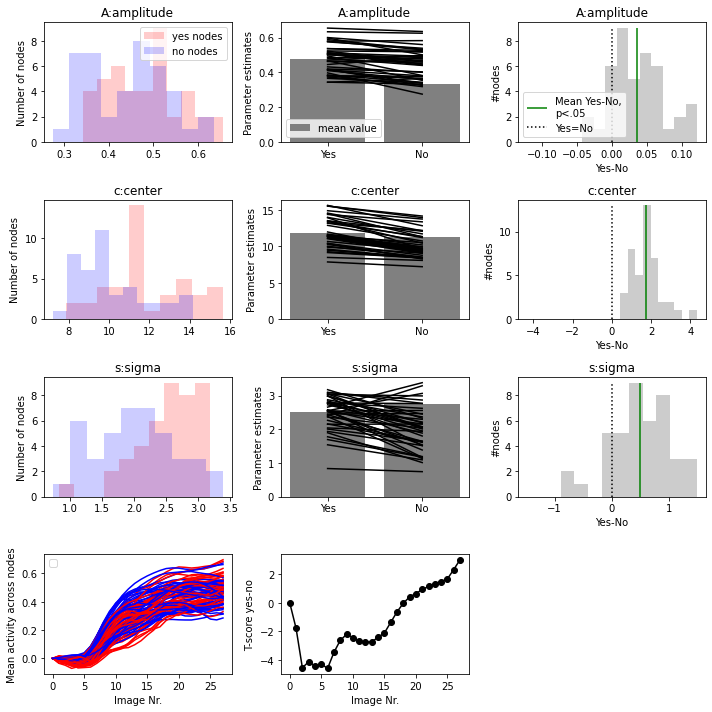

In [151]:
nodes_subset = np.where(labels==1)[0]

r2 = 1000.0+np.zeros_like(nodes_subset)

titles = ['A:amplitude', 'c:center', 's:sigma']

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
params_yes = np.zeros((len(nodes_subset),3))
params_no  = np.zeros((len(nodes_subset),3))

unfit = 0
for i,node in enumerate(nodes_subset):
    #row = int(np.floor(i/ncols))
    #col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))
    #plt.plot(range(28),yyes)
    try:
            #print(i)  
            #form = 'logistic'
            #model = StepModel(form=form) + LinearModel()
        model = Model(logistic_function)#,nan_policy = 'omit') # solve this error, add hints etc. in model fits
        
        if i==0:
            print('parameter names: {}'.format(model.param_names))
            print('independent variables: {}'.format(model.independent_vars))

        params = model.make_params(c=np.argmax(np.diff(yyes)), A = max(yyes)-min(yyes), s = 5)
        result = model.fit(yyes, params, x=x)
        params_yes[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

        params = model.make_params(c=np.argmax(np.diff(yno)), A = max(yno)-min(yno), s = 5)
        result = model.fit(yno, params, x=x)
        params_no[i,:] = np.array([result.best_values['A'], result.best_values['c'], result.best_values['s']])

    except:
        #print("does not fit")
        unfit += 1
    
print(unfit,'out of ',i,'nodes')
    

    
nrows = 4
ncols = 3
xwidth = 10
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((3,)),np.zeros((3,))

for i in range(3):
    r= i
    c= 0
    ax[r,c].hist(params_yes[:,i], color = 'red', alpha = .2, label = 'yes nodes')
    ax[r,c].hist(params_no[:,i], color = 'blue', alpha = .2, label = 'no nodes')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_ylabel('Number of nodes')
    if r==0:
        ax[r,c].legend()
    
    c=1
    for row in range(len(params_yes[:,i])):
        ax[r,c].plot(range(2),np.array([params_yes[row,i],params_no[row,i]]), color = 'k')
    ax[r,c].bar(range(2),np.array([np.mean(params_yes[:,i]),np.mean(params_no[row,i])]),
                color = 'grey', label = 'mean value')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_xticks([0,1])
    ax[r,c].set_xticklabels(['Yes','No'])
    ax[r,c].set_ylabel('Parameter estimates')
    if r==0:
        ax[r,c].legend()

    c=2
    n,bins,_ = ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
    ax[r,c].set_title(titles[i])
    t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
    if p[i] < .05:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'solid',
                      label = 'Mean Yes-No,\np<.05')
    else:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,(n),'g', ls = 'dashed',
                       label = 'Mean Yes-No,\np>=.05')
    ax[r,c].vlines(0,0,max(n),'k', ls = 'dotted', label = 'Yes=No')
    if r== 0:
        ax[r,c].legend(loc = 'lower left')

    ax[r,c].set_xlim(-1.1*max(np.abs(bins)),1.1*max(np.abs(bins)))
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
    
for n in nodes_subset:
    ax[3,0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
    ax[3,0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

#ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
#ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[3,0].set_ylabel('Mean activity across nodes')
ax[3,0].set_xlabel('Image Nr.')
ax[3,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(4,3,11)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)

ax[3,2].axis(False)

plt.tight_layout()

In [152]:
def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

parameter names: ['a', 'b', 'c', 'd']
independent variables: ['x']
0 out of  41 nodes


No handles with labels found to put in legend.


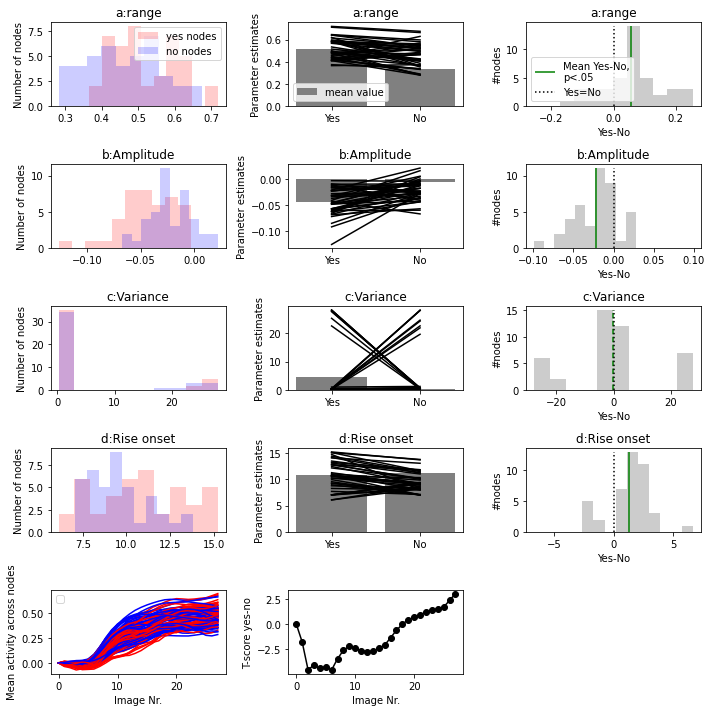

In [191]:
nodes_subset = np.where(labels==1)[0]

titles = ['a:range', 'b:Amplitude', 'c:Variance', 'd:Rise onset']

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
params_yes = np.zeros((len(nodes_subset),len(titles)))
params_no  = np.zeros((len(nodes_subset),len(titles)))

unfit = 0
for i,node in enumerate(nodes_subset):
    #row = int(np.floor(i/ncols))
    #col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))
    #plt.plot(range(28),yyes)
    #try:
    model = Model(sigmoid)#,nan_policy = 'omit') # solve this error, add hints etc. in model fits
    model.set_param_hint('d', min=0, max=27)
    model.set_param_hint('c', min=0, max=28)
    model.set_param_hint('b', min=-10, max=10)
    model.set_param_hint('a', min= -10, max=10)
                
    
    if i==0:
        print('parameter names: {}'.format(model.param_names))
        print('independent variables: {}'.format(model.independent_vars))

    params = model.make_params(a = max(yyes)-min(yyes), b = max(yyes)-min(yyes), c = 5, d = np.argmax(np.diff(yyes)))
    
    result = model.fit(yyes, params, x=x)
    params_yes[i,:] = np.array([result.best_values[titles[0][0]], result.best_values[titles[1][0]], 
                                result.best_values[titles[2][0]], result.best_values[titles[3][0]]])

    params = model.make_params(a = max(yno)-min(yno), b = max(yno)-min(yno), c = 5, d = np.argmax(np.diff(yno)))
    result = model.fit(yno, params, x=x)
    params_no[i,:] = np.array([result.best_values[titles[0][0]], result.best_values[titles[1][0]], 
                                result.best_values[titles[2][0]], result.best_values[titles[3][0]]])
    #except:
        #print("does not fit")
    #    unfit += 1
    
print(unfit,'out of ',i,'nodes')

    
nrows = 5
ncols = 3
xwidth = 10
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((len(titles),)),np.zeros((len(titles),))

for i in range(len(titles)):
    r= i
    c= 0
    ax[r,c].hist(params_yes[:,i], color = 'red', alpha = .2, label = 'yes nodes')
    ax[r,c].hist(params_no[:,i], color = 'blue', alpha = .2, label = 'no nodes')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_ylabel('Number of nodes')
    if r==0:
        ax[r,c].legend()
    
    c=1
    for row in range(len(params_yes[:,i])):
        ax[r,c].plot(range(2),np.array([params_yes[row,i],params_no[row,i]]), color = 'k')
    ax[r,c].bar(range(2),np.array([np.mean(params_yes[:,i]),np.mean(params_no[row,i])]),
                color = 'grey', label = 'mean value')
    ax[r,c].set_title(titles[i])
    ax[r,c].set_xticks([0,1])
    ax[r,c].set_xticklabels(['Yes','No'])
    ax[r,c].set_ylabel('Parameter estimates')
    if r==0:
        ax[r,c].legend()

    c=2
    n,bins,_ = ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
    ax[r,c].set_title(titles[i])
    t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
    if p[i] < .05:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'solid',
                      label = 'Mean Yes-No,\np<.05')
    else:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,max(n),'g', ls = 'dashed',
                       label = 'Mean Yes-No,\np>=.05')
    ax[r,c].vlines(0,0,max(n),'k', ls = 'dotted', label = 'Yes=No')
    if r== 0:
        ax[r,c].legend(loc = 'lower left')

    ax[r,c].set_xlim(-1.1*max(np.abs(bins)),1.1*max(np.abs(bins)))
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
    
for n in nodes_subset:
    ax[len(titles),0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
    ax[len(titles),0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

#ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
#ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[len(titles),0].set_ylabel('Mean activity across nodes')
ax[len(titles),0].set_xlabel('Image Nr.')
ax[len(titles),0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(len(titles)+1,3,14)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)

ax[4,2].axis(False)

plt.tight_layout()

In [ ]:
nrows = 4
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((5,)),np.zeros((5,))

for i in range(5):
    r= int(np.floor(i/2))
    c= int(np.floor(i%2))
    ax[r,c].hist(params_yes[:,i]-params_no[:,i], color = 'grey', alpha = .4)
    ax[r,c].set_title(titles[i])
    t[i],p[i] = stats.ttest_1samp(params_yes[:,i]-params_no[:,i],0)
    if p[i] < .05:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,40,'g', ls = 'solid')
    else:
        ax[r,c].vlines(np.mean(params_yes[:,i]-params_no[:,i]),0,40,'g', ls = 'dashed')
    ax[r,c].vlines(0,0,40,'k')
    #ax[r,c].legend()


    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')

for n in nodes_subset:
    ax[3,0].plot(range(meanTimecourse_yes[nodes_subset,:].shape[1]), meanTimecourse_yes[n,:], color = 'r')#, label = 'Yes')
    ax[3,0].plot(range(meanTimecourse_no[nodes_subset,:].shape[1]), meanTimecourse_no[n,:], color = 'b')#, label = 'No')

#ax[3,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
#ax[3,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[3,0].set_ylabel('Mean activity across nodes')
ax[3,0].set_xlabel('Image Nr.')
ax[3,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(4,2,8)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)


plt.tight_layout()

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-113-3f658bd0838e>:2: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


12 out of  80 nodes
[ 0.714442   -3.8266597  -0.04416918  0.70795269] [4.77033443e-01 2.56433145e-04 9.64879612e-01 4.81032197e-01]


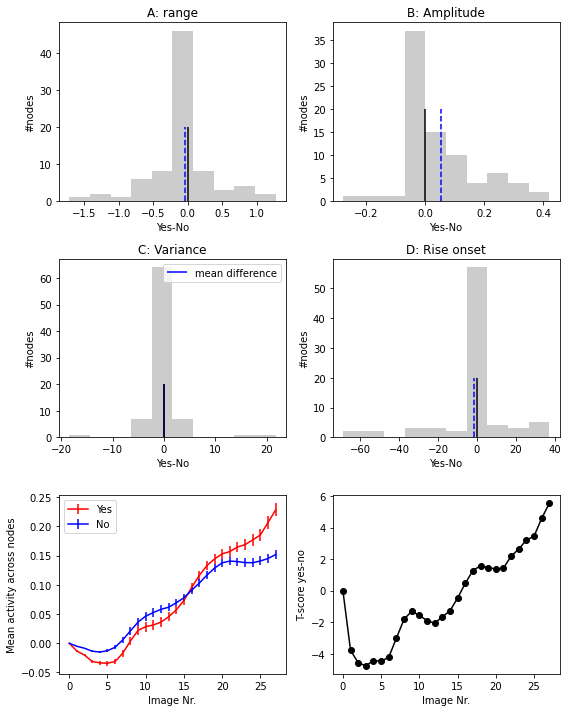

In [181]:
nodes_subset = nodescluster0

r2 = 1000.0+np.zeros_like(nodes_subset)

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
a_yes = np.zeros((len(nodes_subset)))
b_yes = np.zeros_like(a_yes)
c_yes = np.zeros_like(a_yes)
d_yes = np.zeros_like(a_yes)

a_no = np.zeros_like(a_yes)
b_no = np.zeros_like(a_yes)
c_no = np.zeros_like(a_yes)
d_no = np.zeros_like(a_yes)

unfit = 0
for i,node in enumerate(nodes_subset):
    row = int(np.floor(i/ncols))
    col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))

    try:
        #print(i)   
        (a_yes[i], b_yes[i], c_yes[i], d_yes[i]), _ = opt.curve_fit(sigmoid, x, yyes)
        (a_no[i], b_no[i], c_no[i], d_no[i]), _ = opt.curve_fit(sigmoid, x, yno)
    except:
        #print("does not fit")
        unfit += 1
print(unfit,'out of ',i,'nodes')


nrows = 3
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((4,)),np.zeros((4,))
ax[0,0].hist(a_yes-a_no, color = 'grey', alpha = .4)
ax[0,0].set_title("A: range")
t[0],p[0] = stats.ttest_1samp(a_no-a_yes,0)
ax[0,0].vlines(np.mean(a_yes-a_no),0,20,'b', ls = 'dashed')

ax[0,1].hist(b_yes-b_no, color = 'grey', alpha = .4)
ax[0,1].set_title("B: Amplitude")
t[1],p[1] = stats.ttest_1samp(b_no-b_yes,0)
ax[0,1].vlines(np.mean(b_yes-b_no),0,20,'b', ls = 'dashed')

ax[1,0].hist(c_yes-c_no, color = 'grey', alpha = .4)
ax[1,0].set_title("C: Variance")
t[2],p[2] = stats.ttest_1samp(c_no-c_yes,0)
ax[1,0].vlines(np.mean(c_yes-c_no),0,20,'b', ls = 'solid', label = 'mean difference')
ax[1,0].legend()


ax[1,1].hist(d_yes-d_no, color = 'grey', alpha = .4)
ax[1,1].set_title("D: Rise onset")
t[3],p[3] = stats.ttest_1samp(d_no-d_yes,0)
ax[1,1].vlines(np.mean(d_yes-d_no),0,20,'b', ls = 'dashed')

print(t,p)

for i in range(4):
    r = int(np.floor(i/2))
    c = int(i%2)
    ax[r,c].vlines(0,0,20,'k')
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
ax[2,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
ax[2,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[2,0].set_ylabel('Mean activity across nodes')
ax[2,0].set_xlabel('Image Nr.')
ax[2,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(3,2,6)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)


plt.tight_layout()

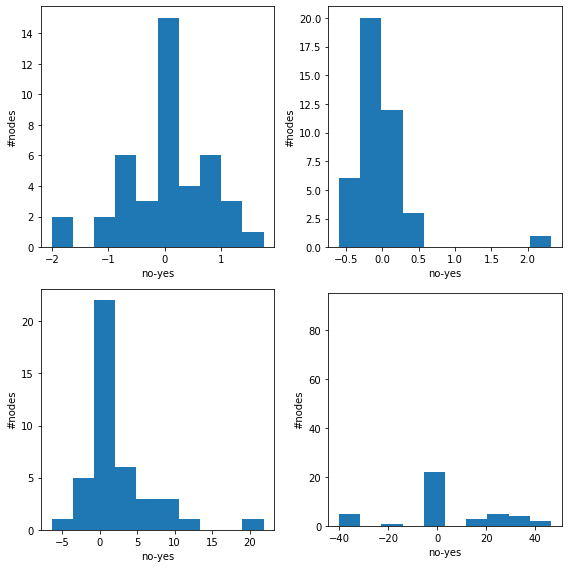

## Extra code (prob. useful for later)

0.08924592542102139
0.07268501766226532


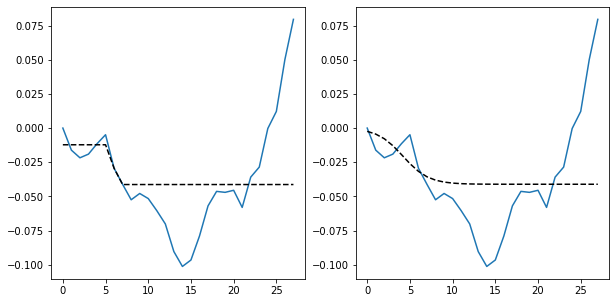

In [88]:
# sigmoid function without lmfit

import scipy.optimize as opt

def sigmoid(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

plt.figure(1,figsize = (10,5))
roi = 10

y = meanTimecourse_yes[roi-1,:]
x = np.arange(y.shape[0])
plt.subplot(121)
plt.plot(x, y)
(a_, b_, c_, d_), _ = opt.curve_fit(sigmoid, x, y)
y_fit = sigmoid(x, a_, b_, c_, d_)
plt.plot(x, y_fit, 'k--')

# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)

# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


def logistic_function(x, A, c, s):
    return A*(1 - (1/ (1+np.exp((x-c)/s)) ))

#roi = 0

#y = meanTimecourse_yes[roi-1,:]
#x = np.arange(y.shape[0])
plt.subplot(1,2,2)
plt.plot(x, y)
(A_, c_, s_), _ = opt.curve_fit(logistic_function, x, y)
y_fit2 = logistic_function(x, A_, c_, s_)
plt.plot(x, y_fit2, 'k--')

# residual sum of squares
ss_res2 = np.sum((y - y_fit2) ** 2)

# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# r-squared
r2 = 1 - (ss_res2 / ss_tot)
print(r2)

0 out of  41 nodes
[ 6.1759064  14.93815945  6.13953652  0.        ] [2.43148273e-07 3.48231811e-18 2.73916899e-07 0.00000000e+00]


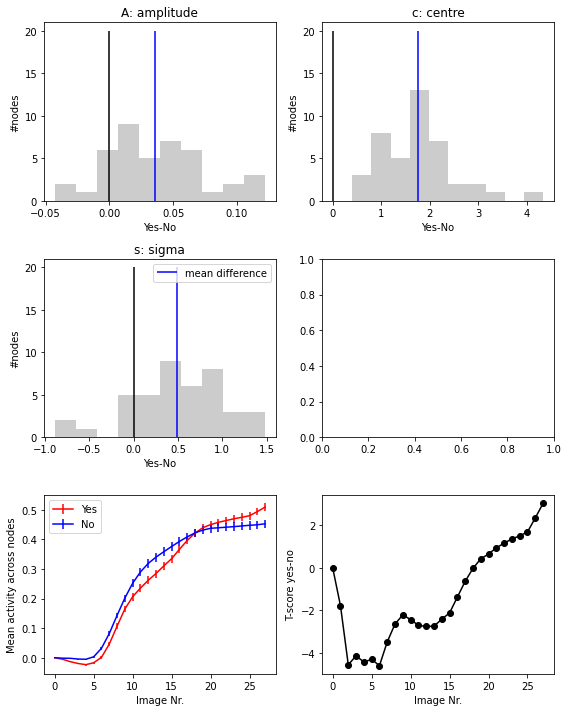

In [104]:
# Fitting a 3-parameter logistic function to our data in the sigmoid cluster
nodes_subset = np.where(labels==1)[0]

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
A_yes = np.zeros((len(nodes_subset)))
c_yes = np.zeros_like(A_yes)
s_yes = np.zeros_like(A_yes)

A_no = np.zeros_like(A_yes)
c_no = np.zeros_like(A_yes)
s_no = np.zeros_like(A_yes)

unfit = 0
for i,node in enumerate(nodes_subset):
    row = int(np.floor(i/ncols))
    col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))

    try:
    #print(i)   
        (A_yes[i], c_yes[i], s_yes[i]), _ = opt.curve_fit(logistic_function, x, yyes)
        (A_no[i], c_no[i], s_no[i]), _ = opt.curve_fit(logistic_function, x, yno)
    except:
        #print("does not fit")
        unfit += 1
print(unfit,'out of ',i,'nodes')


nrows = 3
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((4,)),np.zeros((4,))
ax[0,0].hist(A_yes-A_no, color = 'grey', alpha = .4)
ax[0,0].set_title("A: amplitude")
t[0],p[0] = stats.ttest_1samp(A_yes-A_no,0)
ax[0,0].vlines(np.mean(A_yes-A_no),0,20,'b', ls = 'solid')

ax[0,1].hist(c_yes-c_no, color = 'grey', alpha = .4)
ax[0,1].set_title("c: centre")
t[1],p[1] = stats.ttest_1samp(c_yes-c_no,0)
ax[0,1].vlines(np.mean(c_yes-c_no),0,20,'b', ls = 'solid')

ax[1,0].hist(s_yes-s_no, color = 'grey', alpha = .4)
ax[1,0].set_title("s: sigma")
t[2],p[2] = stats.ttest_1samp(s_yes-s_no,0)
ax[1,0].vlines(np.mean(s_yes-s_no),0,20,'b', ls = 'solid', label = 'mean difference')
ax[1,0].legend()

print(t,p)

for i in range(3):
    r = int(np.floor(i/2))
    c = int(i%2)
    ax[r,c].vlines(0,0,20,'k')
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
ax[2,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
ax[2,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[2,0].set_ylabel('Mean activity across nodes')
ax[2,0].set_xlabel('Image Nr.')
ax[2,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(3,2,6)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)

plt.tight_layout()

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-90-e944ece862b6>:5: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0 out of  41 nodes
[-0.18197216  0.14532018 -2.85014119 -1.1200794 ] [0.8565013  0.88517016 0.00680868 0.26919852]


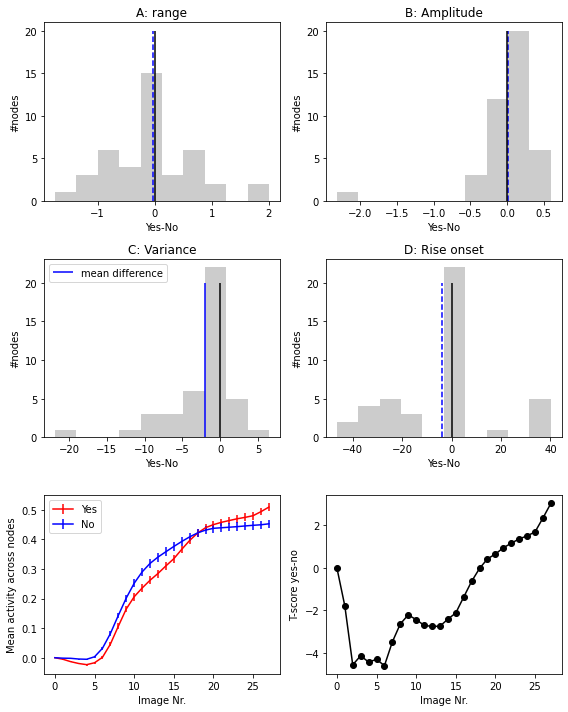

In [105]:
# okay, so logistic regression fits the data reasonably well for cluster 1. 
# Next, we also try the 4-parameter sigmoid function for cluster 1, but the interpretations
# are a bit confusing to me

nodes_subset = np.where(labels==1)[0]

#fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (20,15))
a_yes = np.zeros((len(nodes_subset)))
b_yes = np.zeros_like(a_yes)
c_yes = np.zeros_like(a_yes)
d_yes = np.zeros_like(a_yes)

a_no = np.zeros_like(a_yes)
b_no = np.zeros_like(a_yes)
c_no = np.zeros_like(a_yes)
d_no = np.zeros_like(a_yes)

unfit = 0
for i,node in enumerate(nodes_subset):
    row = int(np.floor(i/ncols))
    col = int(np.floor(i%ncols))
    #node = nodes[0]
    #plt.subplot(nrows,ncols,i+1)
    yyes = meanTimecourse_yes[node,:]
    yno = meanTimecourse_no[node,:]
    x = np.arange(len(yyes))

    try:
        #print(i)   
        (a_yes[i], b_yes[i], c_yes[i], d_yes[i]), _ = opt.curve_fit(sigmoid, x, yyes)
        (a_no[i], b_no[i], c_no[i], d_no[i]), _ = opt.curve_fit(sigmoid, x, yno)
    except:
        #print("does not fit")
        unfit += 1
print(unfit,'out of ',i,'nodes')


nrows = 3
ncols = 2
xwidth = 8
yheight = 10
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))

t,p = np.zeros((4,)),np.zeros((4,))
ax[0,0].hist(a_yes-a_no, color = 'grey', alpha = .4)
ax[0,0].set_title("A: range")
t[0],p[0] = stats.ttest_1samp(a_yes-a_no,0)
ax[0,0].vlines(np.mean(a_yes-a_no),0,20,'b', ls = 'dashed')

ax[0,1].hist(b_yes-b_no, color = 'grey', alpha = .4)
ax[0,1].set_title("B: Amplitude")
t[1],p[1] = stats.ttest_1samp(b_yes-b_no,0)
ax[0,1].vlines(np.mean(b_yes-b_no),0,20,'b', ls = 'dashed')

ax[1,0].hist(c_yes-c_no, color = 'grey', alpha = .4)
ax[1,0].set_title("C: Variance")
t[2],p[2] = stats.ttest_1samp(c_yes-c_no,0)
ax[1,0].vlines(np.mean(c_yes-c_no),0,20,'b', ls = 'solid', label = 'mean difference')
ax[1,0].legend()


ax[1,1].hist(d_yes-d_no, color = 'grey', alpha = .4)
ax[1,1].set_title("D: Rise onset")
t[3],p[3] = stats.ttest_1samp(d_yes-d_no,0)
ax[1,1].vlines(np.mean(d_yes-d_no),0,20,'b', ls = 'dashed')

print(t,p)

for i in range(4):
    r = int(np.floor(i/2))
    c = int(i%2)
    ax[r,c].vlines(0,0,20,'k')
    ax[r,c].set_xlabel('Yes-No')
    ax[r,c].set_ylabel('#nodes')
    plt.axis('square')
    
ax[2,0].errorbar(range(meanTimecourse_yes[nodes_subset,:].shape[1]), np.mean(meanTimecourse_yes[nodes_subset,:],axis=0), stats.sem(meanTimecourse_yes[nodes_subset,:],axis=0), color = 'r', label = 'Yes')
ax[2,0].errorbar(range(meanTimecourse_no[nodes_subset,:].shape[1]), np.mean(meanTimecourse_no[nodes_subset,:],axis=0), stats.sem(meanTimecourse_no[nodes_subset,:],axis=0), color = 'b', label = 'No')
ax[2,0].set_ylabel('Mean activity across nodes')
ax[2,0].set_xlabel('Image Nr.')
ax[2,0].legend()

tscore,pval = np.zeros((meanTimecourse_yes.shape[1],)),np.zeros((meanTimecourse_yes.shape[1],))
for i in np.arange(1,meanTimecourse_yes.shape[1]):
    tscore[i], pval[i] = stats.ttest_ind(meanTimecourse_yes[nodes_subset,i],meanTimecourse_no[nodes_subset,i])
#print(len(range(meanTimecourse_yes.shape[1]))
plt.subplot(3,2,6)
plt.plot(range(meanTimecourse_yes.shape[1]), tscore, color = 'k', marker = 'o')
plt.ylabel('T-score yes-no')
plt.xlabel('Image Nr.')
#ax[2,1].set_xlim(0,28)
#ax[2,1].set_ylim(-3,3)


plt.tight_layout()

parameters: odict_keys(['amplitude', 'center', 'sigma', 'slope', 'intercept'])
[[Model]]
    (Model(step, form='logistic') + Model(linear))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 28
    # variables        = 5
    chi-square         = 0.02117706
    reduced chi-square = 9.2074e-04
    Akaike info crit   = -191.237154
    Bayesian info crit = -184.576131
[[Variables]]
    amplitude:  0.41982408 +/- 0.08595186 (20.47%) (init = 1)
    center:     10.3087257 +/- 0.35844899 (3.48%) (init = 8)
    sigma:      1.97460509 +/- 0.50931006 (25.79%) (init = 1)
    slope:      0.00783366 +/- 0.00360963 (46.08%) (init = 1)
    intercept: -0.06465445 +/- 0.01573327 (24.33%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, slope)     = -0.972
    C(amplitude, sigma)     =  0.876
    C(sigma, slope)         = -0.802
    C(center, intercept)    =  0.523
    C(sigma, intercept)     = -0.403
    C(center, s

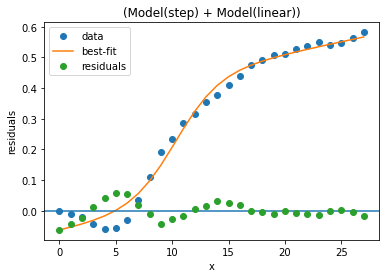

In [106]:
from lmfit.models import StepModel, RectangleModel, LinearModel

roi = 206
form = 'logistic'

y = meanTimecourse_yes[roi-1,:]
x = np.arange(y.shape[0])

model = StepModel(form=form) + LinearModel()
params = model.make_params(center=np.argmax(np.diff(y)), intercept=y[0]) 
# center is the timepoint where y changes the most

print('parameters:',params.keys())

result = model.fit(y, params, x=x)
result.plot_fit()
result.plot_residuals()

print(result.fit_report())

## work in progress here

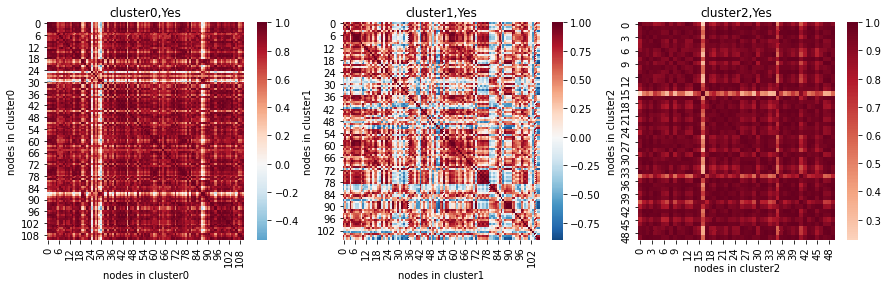

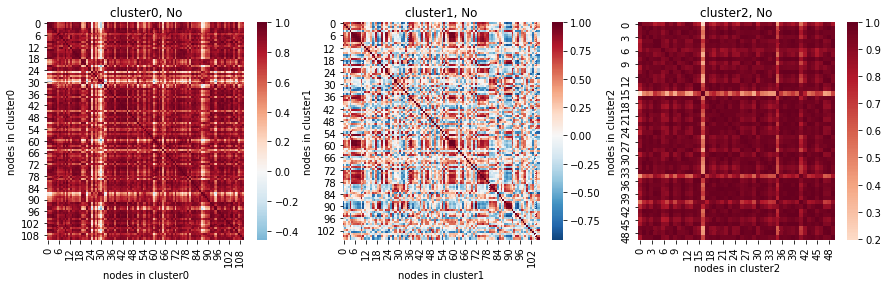

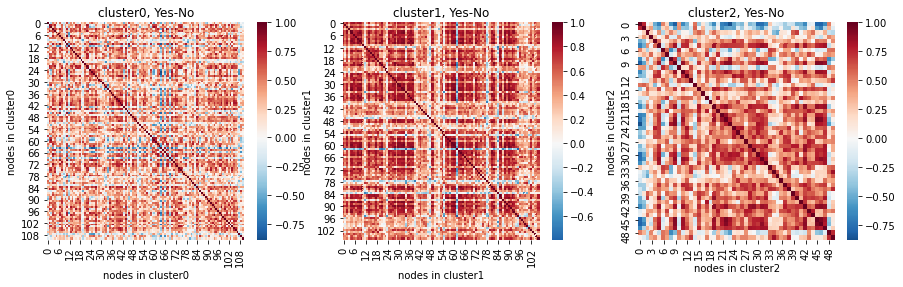

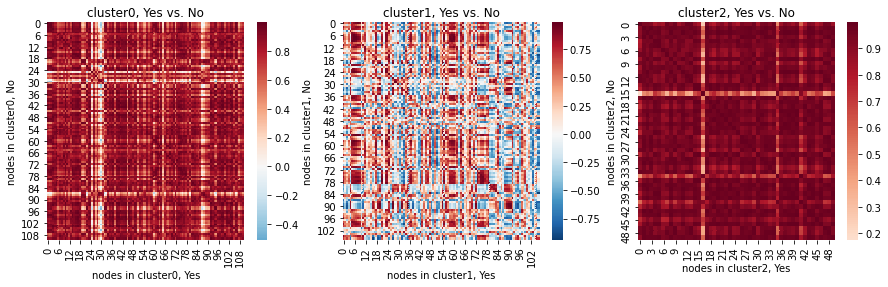

In [282]:
nodes = np.where(cluster_n==0)[0]
plt.figure(1,figsize = (15,4))
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.title('cluster'+str(c) + ',Yes')
    nodes = np.where(cluster_n==c)[0]
    ind = -1

    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse_yes[n1,:31],meanTimecourse_yes[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0)
    plt.xlabel('nodes in cluster'+str(c))
    plt.ylabel('nodes in cluster'+str(c))

plt.figure(2,figsize = (15,4))
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.title('cluster'+str(c) + ', No')
    nodes = np.where(cluster_n==c)[0]
    ind = -1

    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse_no[n1,:31],meanTimecourse_no[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0)
    plt.xlabel('nodes in cluster'+str(c))
    plt.ylabel('nodes in cluster'+str(c))

meanTimecourse_diff = meanTimecourse_yes - meanTimecourse_no
nodes = np.where(cluster_n==0)[0]
plt.figure(3,figsize = (15,4))
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.title('cluster'+str(c) +', Yes-No')
    nodes = np.where(cluster_n==c)[0]
    ind = -1

    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse_diff[n1,:31],meanTimecourse_diff[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0)
    plt.xlabel('nodes in cluster'+str(c))
    plt.ylabel('nodes in cluster'+str(c))
    
    
meanTimecourse_diff = meanTimecourse_yes - meanTimecourse_no
nodes = np.where(cluster_n==0)[0]
plt.figure(4,figsize = (15,4))
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.title('cluster'+str(c) +', Yes vs. No')
    nodes = np.where(cluster_n==c)[0]
    ind = -1

    mat = np.zeros((len(nodes),len(nodes)))
    for i1,n1 in enumerate(nodes): #range(movieTC.shape[1]):
        for i2,n2 in enumerate(nodes):
            mat[i1,i2],p = stats.pearsonr(meanTimecourse_yes[n1,:31],meanTimecourse_no[n2,:31])
    sns.heatmap(mat, cmap = 'RdBu_r', center =0)
    plt.xlabel('nodes in cluster'+str(c) + ', Yes')
    plt.ylabel('nodes in cluster'+str(c) + ', No')

